In [2]:
#install.packages("tidyverse")
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
df = read_csv("rpd.csv")
#head(df)
df %>% filter(month.day=="12/28")


── Column specification ────────────────────────────────────────────────────────
cols(
  Date = col_date(format = ""),
  Mileage = col_double(),
  time_corr = col_character(),
  pace_min = col_double(),
  Month = col_double(),
  Day = col_double(),
  month.day = col_character(),
  numRun = col_double(),
  highest = col_double(),
  rpd = col_double(),
  firstRun = col_double(),
  numYear = col_double()
)




Date,Mileage,time_corr,pace_min,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-12-28,5.73,0:51:23,8.967423,12,28,12/28,1,0,1,1,1
2016-12-28,5.00,0:39:00,7.800000,12,28,12/28,2,0,1,1,2
2017-12-28,3.64,0:26:16,7.216117,12,28,12/28,3,0,1,1,3
2018-12-28,6.88,NA,NA,12,28,12/28,4,0,1,1,4
2020-12-28,7.00,0:46:35,6.654762,12,28,12/28,5,0,1,1,5
2021-12-28,6.00,0:44:51,7.475000,12,28,12/28,6,1,1,1,6


In [4]:
dfh = df %>%
    filter(highest==1)
head(dfh)

Date,Mileage,time_corr,pace_min,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-01,6.82,0:48:44,7.145650,1,1,1/1,7,1,1,1,7
2021-01-02,7.09,0:53:35,7.557593,1,2,1/2,5,1,1,1,5
2020-01-03,4.35,0:32:30,7.471264,1,3,1/3,7,1,1,1,6
2021-01-04,7.00,0:53:48,7.685714,1,4,1/4,7,1,1,1,7
2021-01-05,7.43,0:54:13,7.296994,1,5,1/5,7,1,1,1,7
2021-01-06,6.00,0:40:44,6.788889,1,6,1/6,5,1,1,1,5


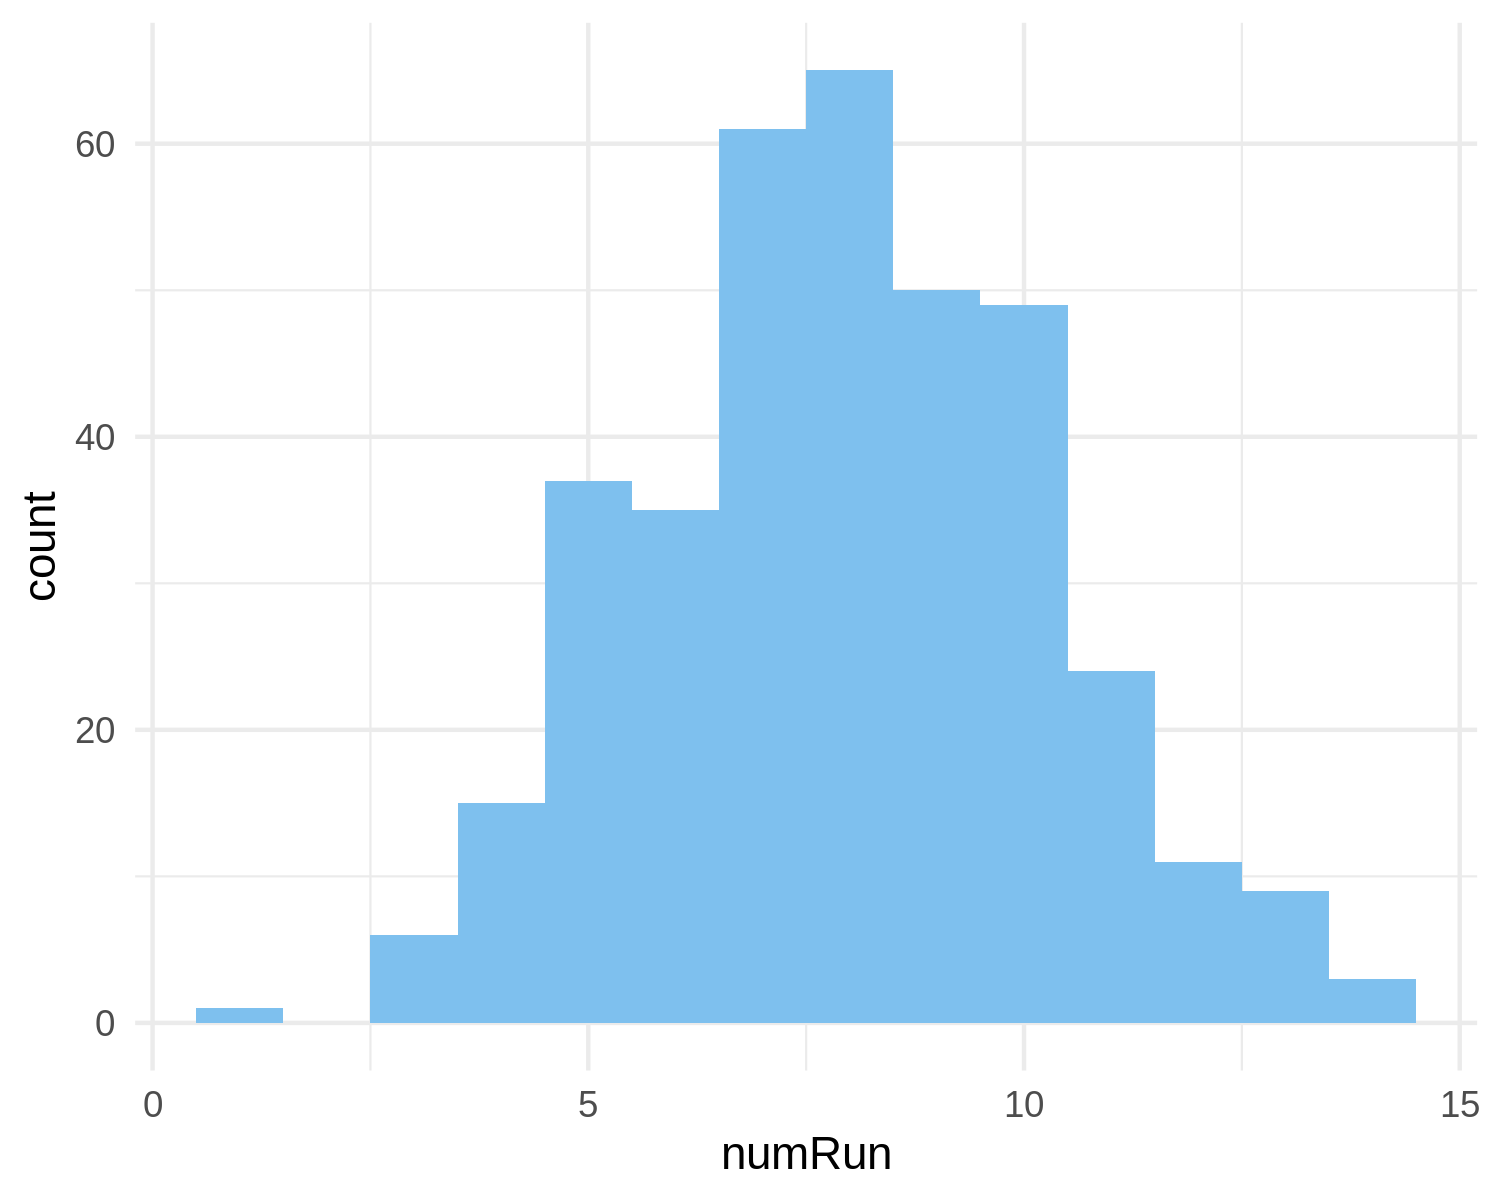

In [5]:
p = ggplot(dfh, aes(x=numRun)) +
    geom_histogram(binwidth=1, fill="skyblue2") +
    theme_minimal()
p

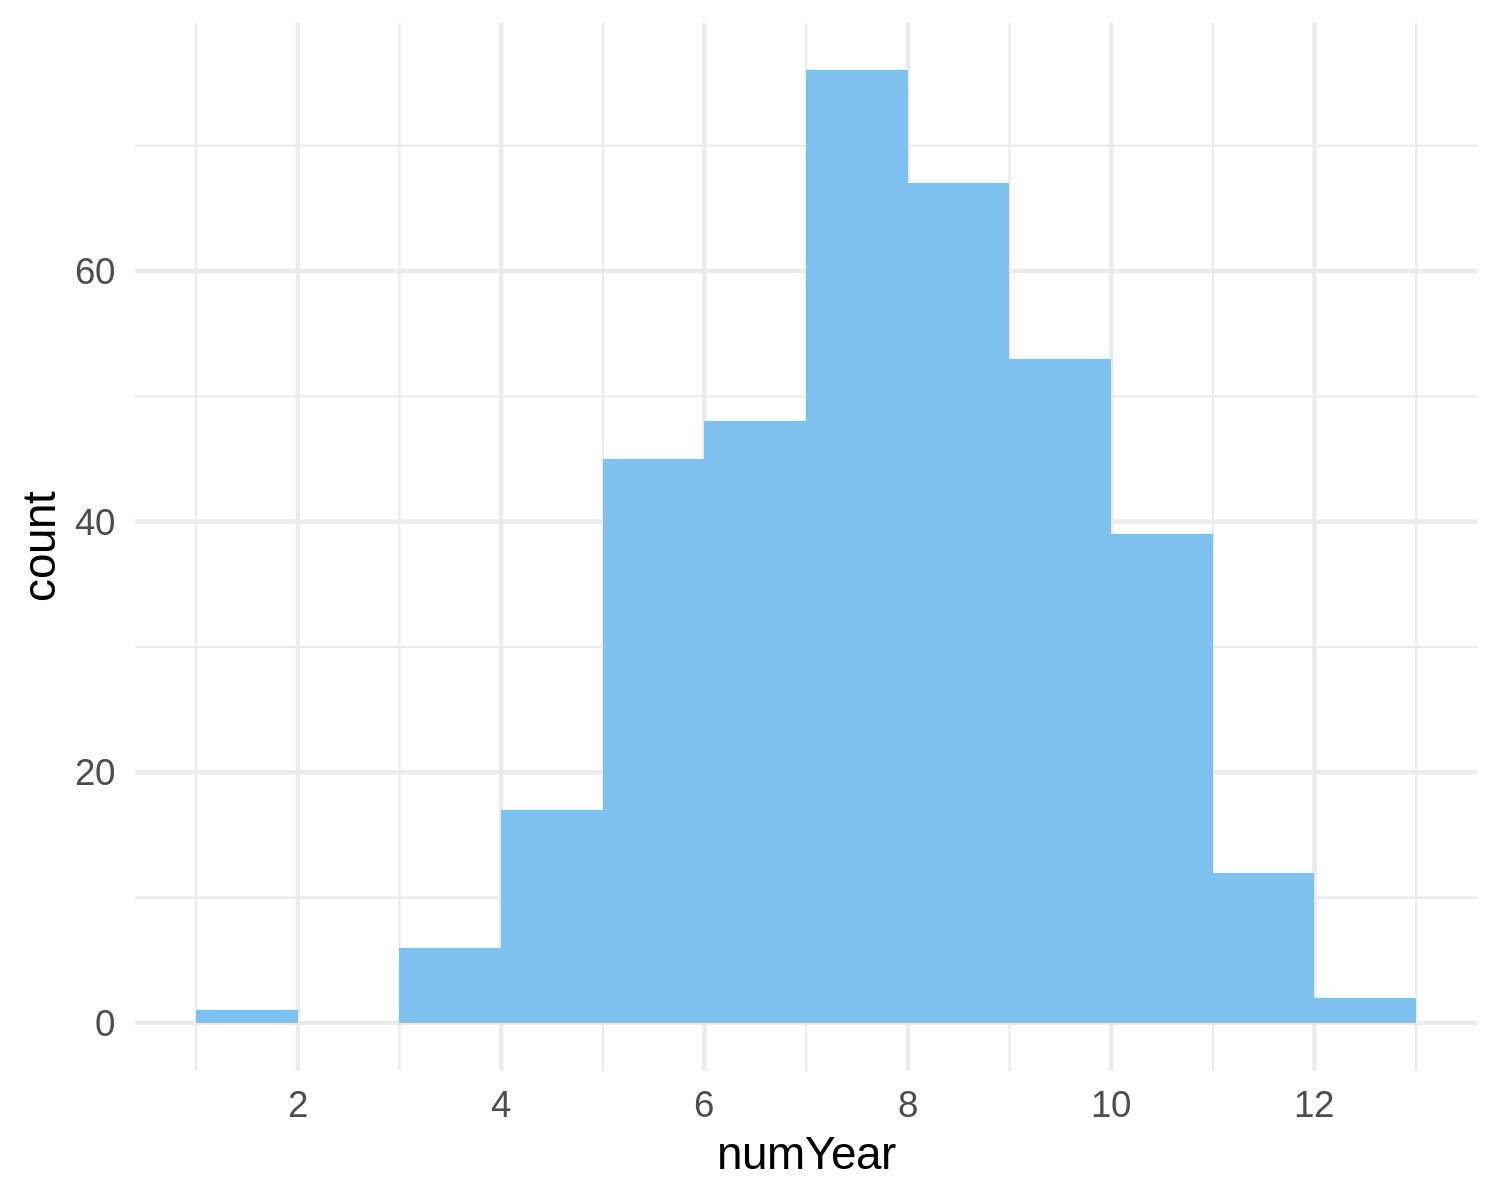

In [6]:
p2 = ggplot(dfh, aes(x=numYear)) +
    geom_histogram(binwidth=1, fill="skyblue2") +
    theme_minimal() +
    scale_x_continuous(breaks=c(-0.5,1.5,3.5,5.5,7.5,9.5,11.5,13.5),labels=c(0,2,4,6,8,10,12,14))
p2

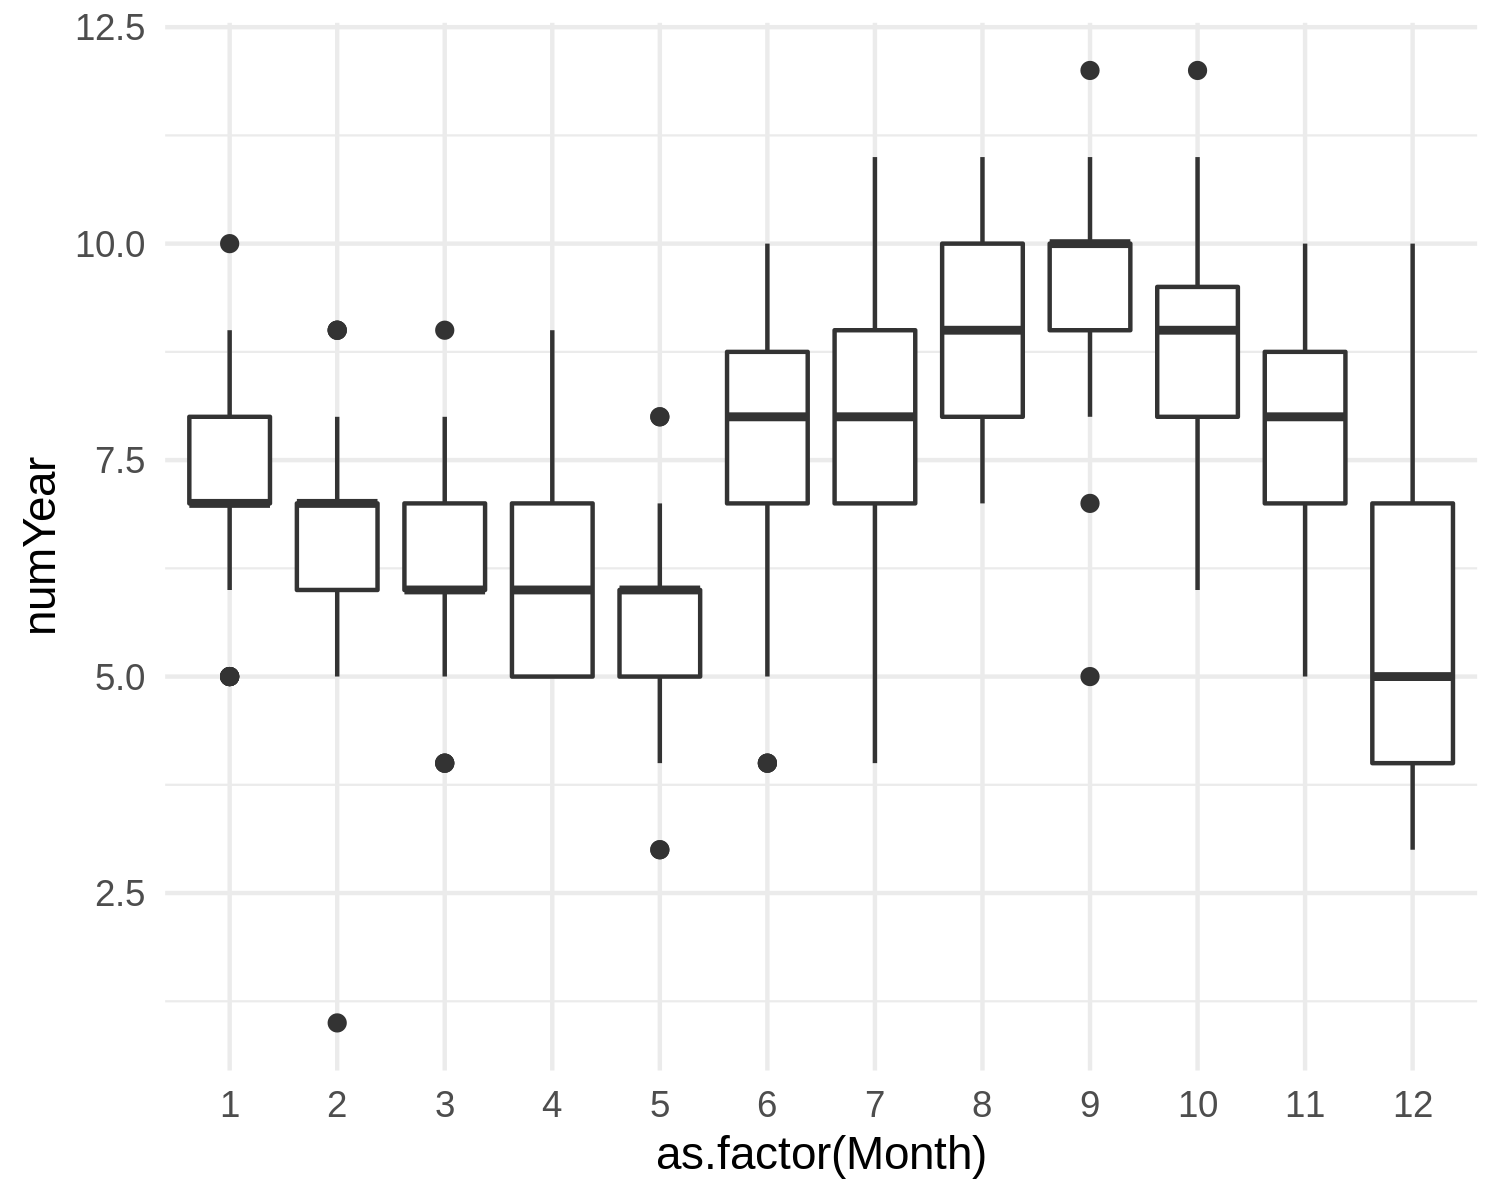

In [7]:
p3 = ggplot(dfh, aes(x=as.factor(Month), y=numYear)) +
    geom_boxplot() +
    theme_minimal()
p3

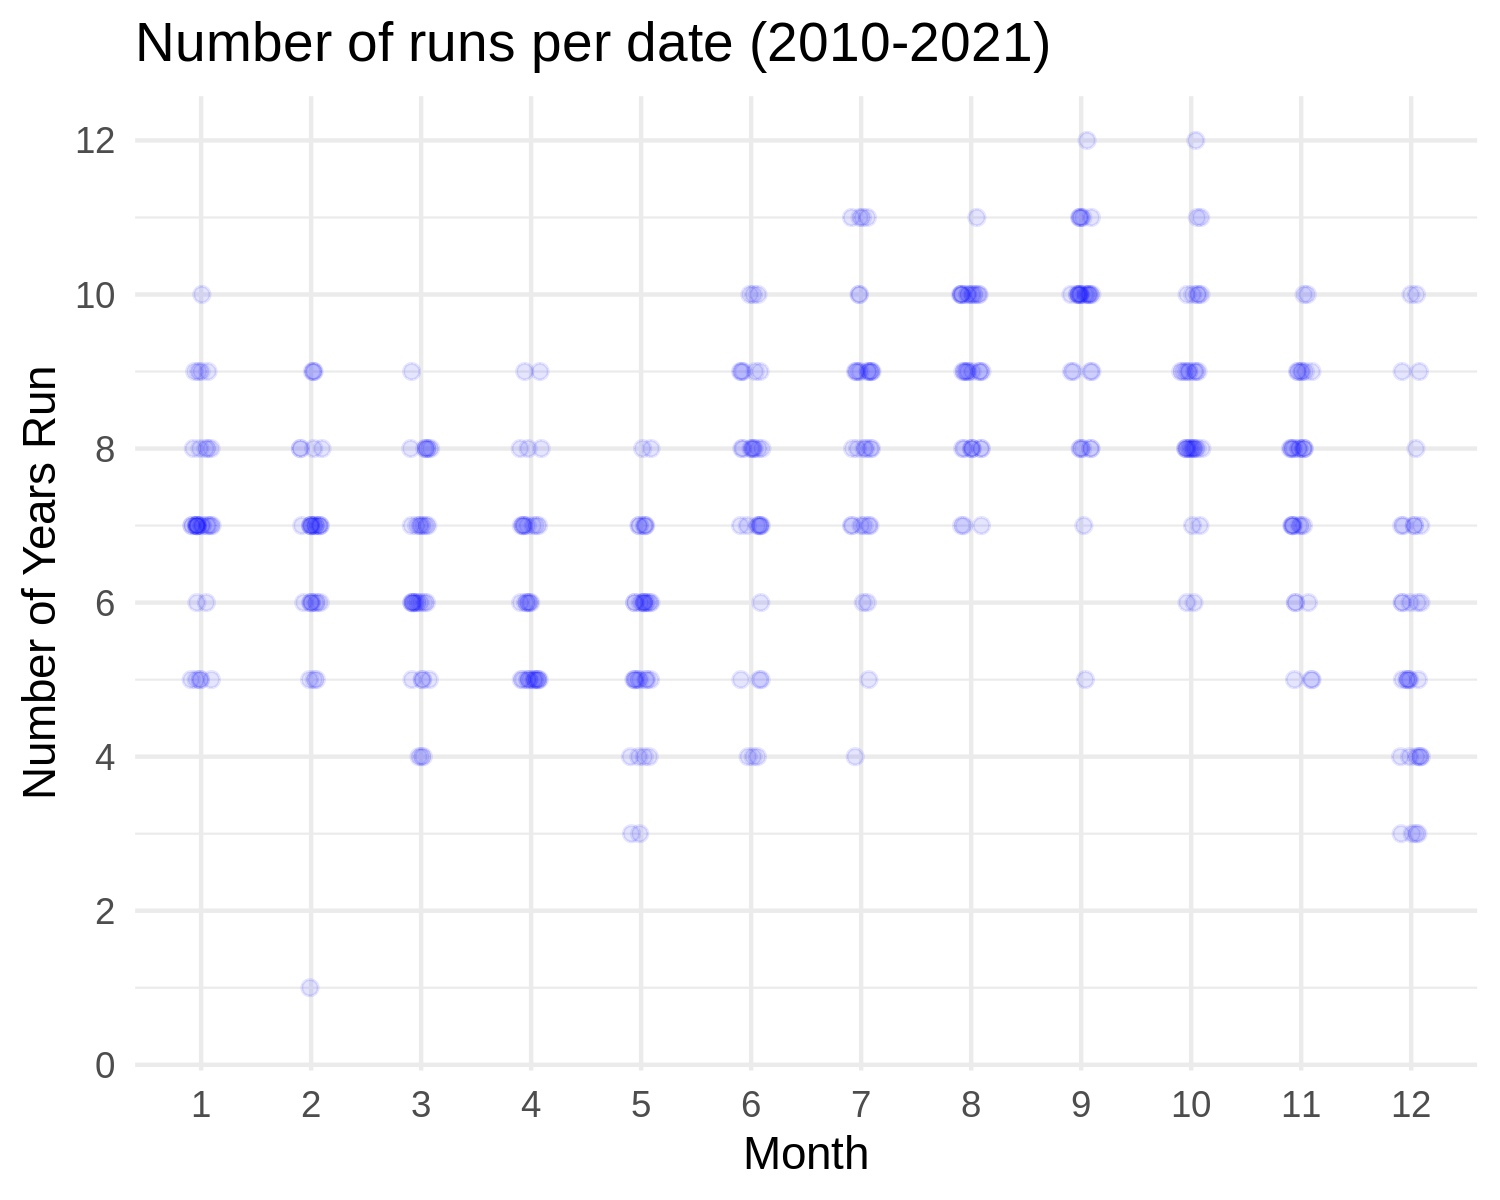

In [8]:
p3 = ggplot(dfh, aes(x=as.factor(Month), y=numYear)) +
    geom_point(position = position_jitter(h=0,w=0.1), color="blue", alpha=.1) +
    theme_minimal() +
    scale_y_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12)) +
    coord_cartesian(ylim = c(0.5,12)) +
    ggtitle("Number of runs per date (2010-2021)") +
    labs(x="Month",y="Number of Years Run")
p3

In [9]:
dfh %>%
    mutate(Date1 = paste(Month,"/",Day, sep="")) %>%
    group_by(Month) %>%
    select("Month","Date1","numYear") %>%
    arrange(numYear) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

Month,Date1,numYear,rk
<dbl>,<chr>,<dbl>,<int>
2,2/29,1,1
5,5/23,3,1
12,12/2,3,1
3,3/19,4,1
6,6/1,4,1
7,7/10,4,1
1,1/2,5,1
4,4/2,5,1
9,9/14,5,1


In [10]:
dfh %>%
    mutate(Date1 = paste(Month,"/",Day, sep="")) %>%
    group_by(Month) %>%
    select("Month","Date1","numYear") %>%
    arrange(-numYear) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

Month,Date1,numYear,rk
<dbl>,<chr>,<dbl>,<int>
9,9/29,12,1
10,10/2,12,1
7,7/8,11,1
8,8/18,11,1
1,1/13,10,1
6,6/21,10,1
11,11/8,10,1
12,12/4,10,1
2,2/8,9,1


In [11]:
YTD <- function(df1, DateOrder, Month, Day){
df1 %>%
    mutate(DateOrder =
           ifelse(Month==1, Day,
                  ifelse(Month==2, 31+Day,
                         ifelse(Month==3, 60+Day,
                                ifelse(Month==4, 91+Day,
                                       ifelse(Month==5, 121+Day,
                                              ifelse(Month==6, 152+Day,
                                                     ifelse(Month==7, 182+Day,
                                                            ifelse(Month==8, 213+Day,
                                                                   ifelse(Month==9, 244+Day,
                                                                          ifelse(Month==10, 274+Day,
                                                                                 ifelse(Month==11, 305+Day,
                                                                                        ifelse(Month==12, 335+Day, NA
                                                                                               )))))))))))))
}

In [12]:
dfd <- YTD(df1=dfh, DateOrder=DateOrder, Month=Month, Day=Day)
tail(dfd)

Date,Mileage,time_corr,pace_min,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-12-26,4.41,0:33:16,7.543462,12,26,12/26,6,1,1,1,6,361
2020-12-27,8.41,0:58:44,6.983750,12,27,12/27,6,1,1,1,6,362
2021-12-28,6.00,0:44:51,7.475000,12,28,12/28,6,1,1,1,6,363
2018-12-29,2.87,NA,NA,12,29,12/29,5,1,1,1,5,364
2020-12-30,7.50,0:52:15,6.966667,12,30,12/30,8,1,1,1,8,365
2020-12-31,6.00,0:44:49,7.469444,12,31,12/31,4,1,1,1,4,366


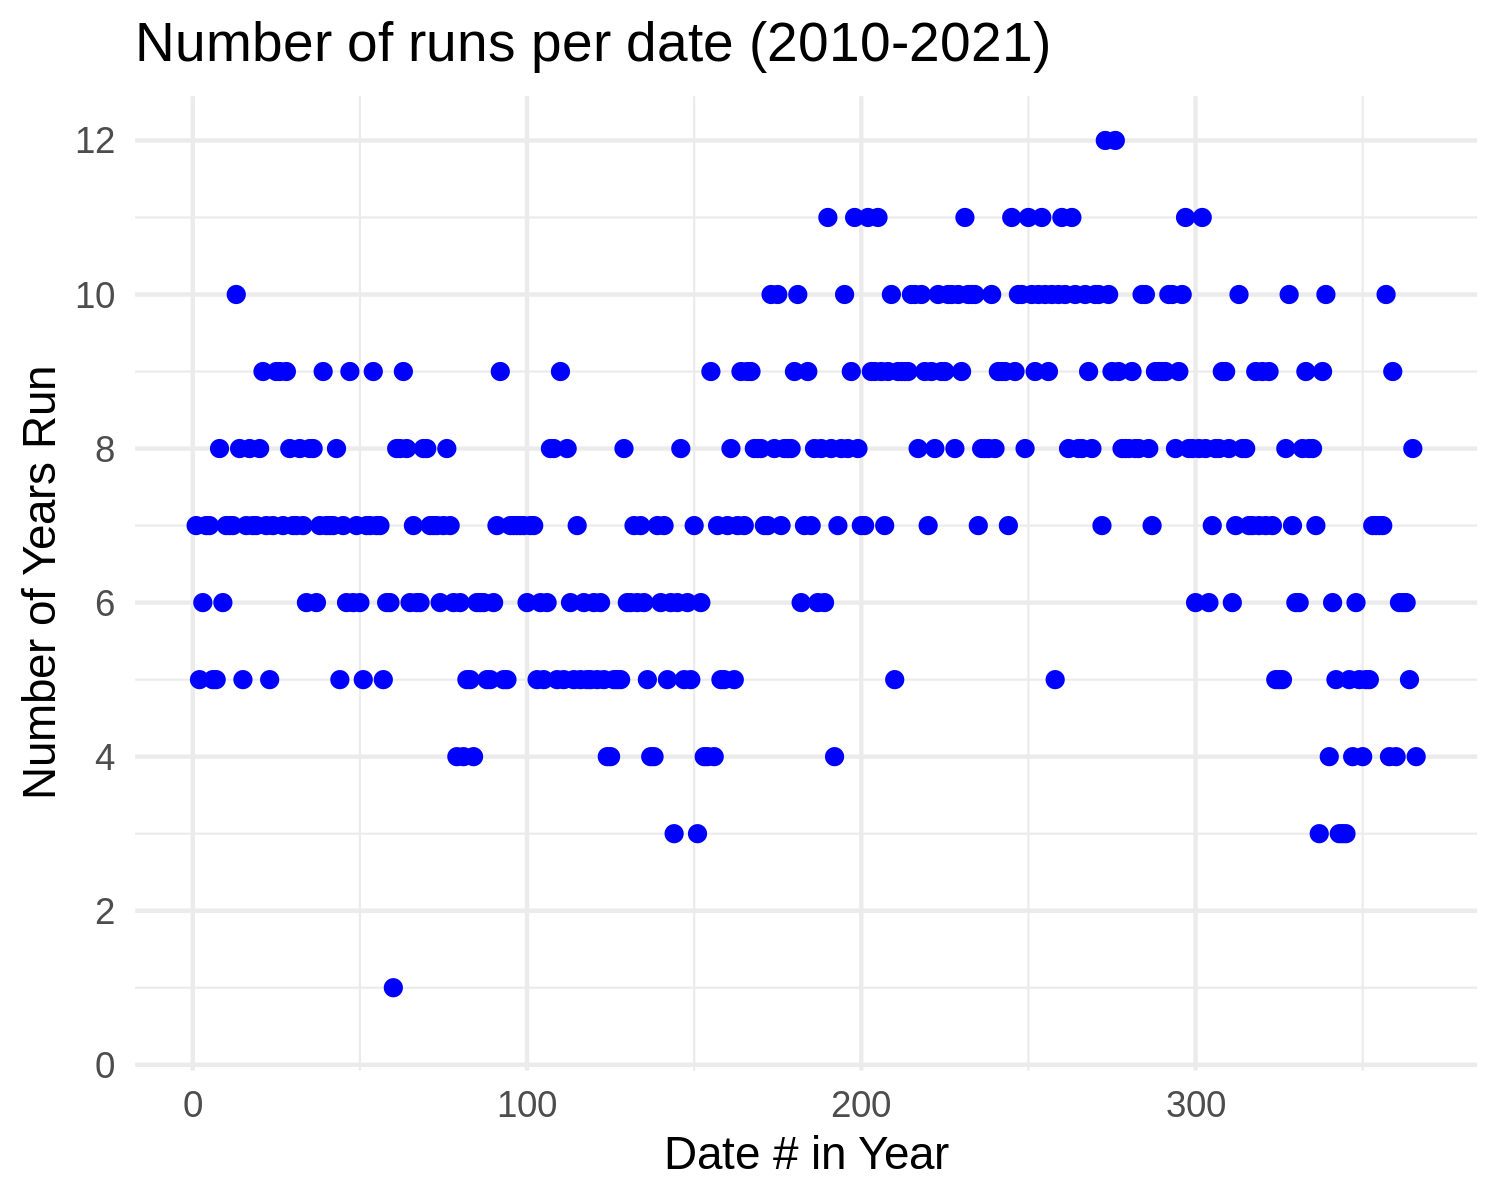

In [13]:
p4 = ggplot(dfd, aes(x=DateOrder, y=numYear)) +
    geom_point(color="blue") +
    theme_minimal() +
    scale_y_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12)) +
    coord_cartesian(ylim = c(0.5,12)) +
    ggtitle("Number of runs per date (2010-2021)") +
    labs(x="Date # in Year",y="Number of Years Run")
p4

In [14]:
df2 <- YTD(df, DateOrder, Month, Day)
# head(df2)
tail(df2)
#df2

Date,Mileage,time_corr,pace_min,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-12-30,2.88,NA,NA,12,30,12/30,7,0,1,1,7,365
2020-12-30,7.50,0:52:15,6.966667,12,30,12/30,8,1,1,1,8,365
2015-12-31,5.55,0:38:47,6.987988,12,31,12/31,1,0,1,1,1,366
2016-12-31,5.37,0:42:46,7.963998,12,31,12/31,2,0,1,1,2,366
2017-12-31,7.00,0:51:16,7.323810,12,31,12/31,3,0,1,1,3,366
2020-12-31,6.00,0:44:49,7.469444,12,31,12/31,4,1,1,1,4,366


In [15]:
df2s <- df2 %>%
    group_by(DateOrder) %>%
    summarize(SumMi = sum(Mileage))
tail(df2s)

DateOrder,SumMi
<dbl>,<dbl>
361,37.65
362,41.13
363,34.25
364,24.67
365,42.27
366,23.92


In [16]:
df2d <- full_join(dfd, df2s, by="DateOrder")
#df2d
tail(df2d)

Date,Mileage,time_corr,pace_min,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder,SumMi
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-12-26,4.41,0:33:16,7.543462,12,26,12/26,6,1,1,1,6,361,37.65
2020-12-27,8.41,0:58:44,6.983750,12,27,12/27,6,1,1,1,6,362,41.13
2021-12-28,6.00,0:44:51,7.475000,12,28,12/28,6,1,1,1,6,363,34.25
2018-12-29,2.87,NA,NA,12,29,12/29,5,1,1,1,5,364,24.67
2020-12-30,7.50,0:52:15,6.966667,12,30,12/30,8,1,1,1,8,365,42.27
2020-12-31,6.00,0:44:49,7.469444,12,31,12/31,4,1,1,1,4,366,23.92


In [17]:
df2e <- df2d %>%
    mutate(MMDD = paste(Month,"/",Day, sep="")) %>%
    select("MMDD","Month","Day","DateOrder","numYear","SumMi")
tail(df2e)

MMDD,Month,Day,DateOrder,numYear,SumMi
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12/26,12,26,361,6,37.65
12/27,12,27,362,6,41.13
12/28,12,28,363,6,34.25
12/29,12,29,364,5,24.67
12/30,12,30,365,8,42.27
12/31,12,31,366,4,23.92


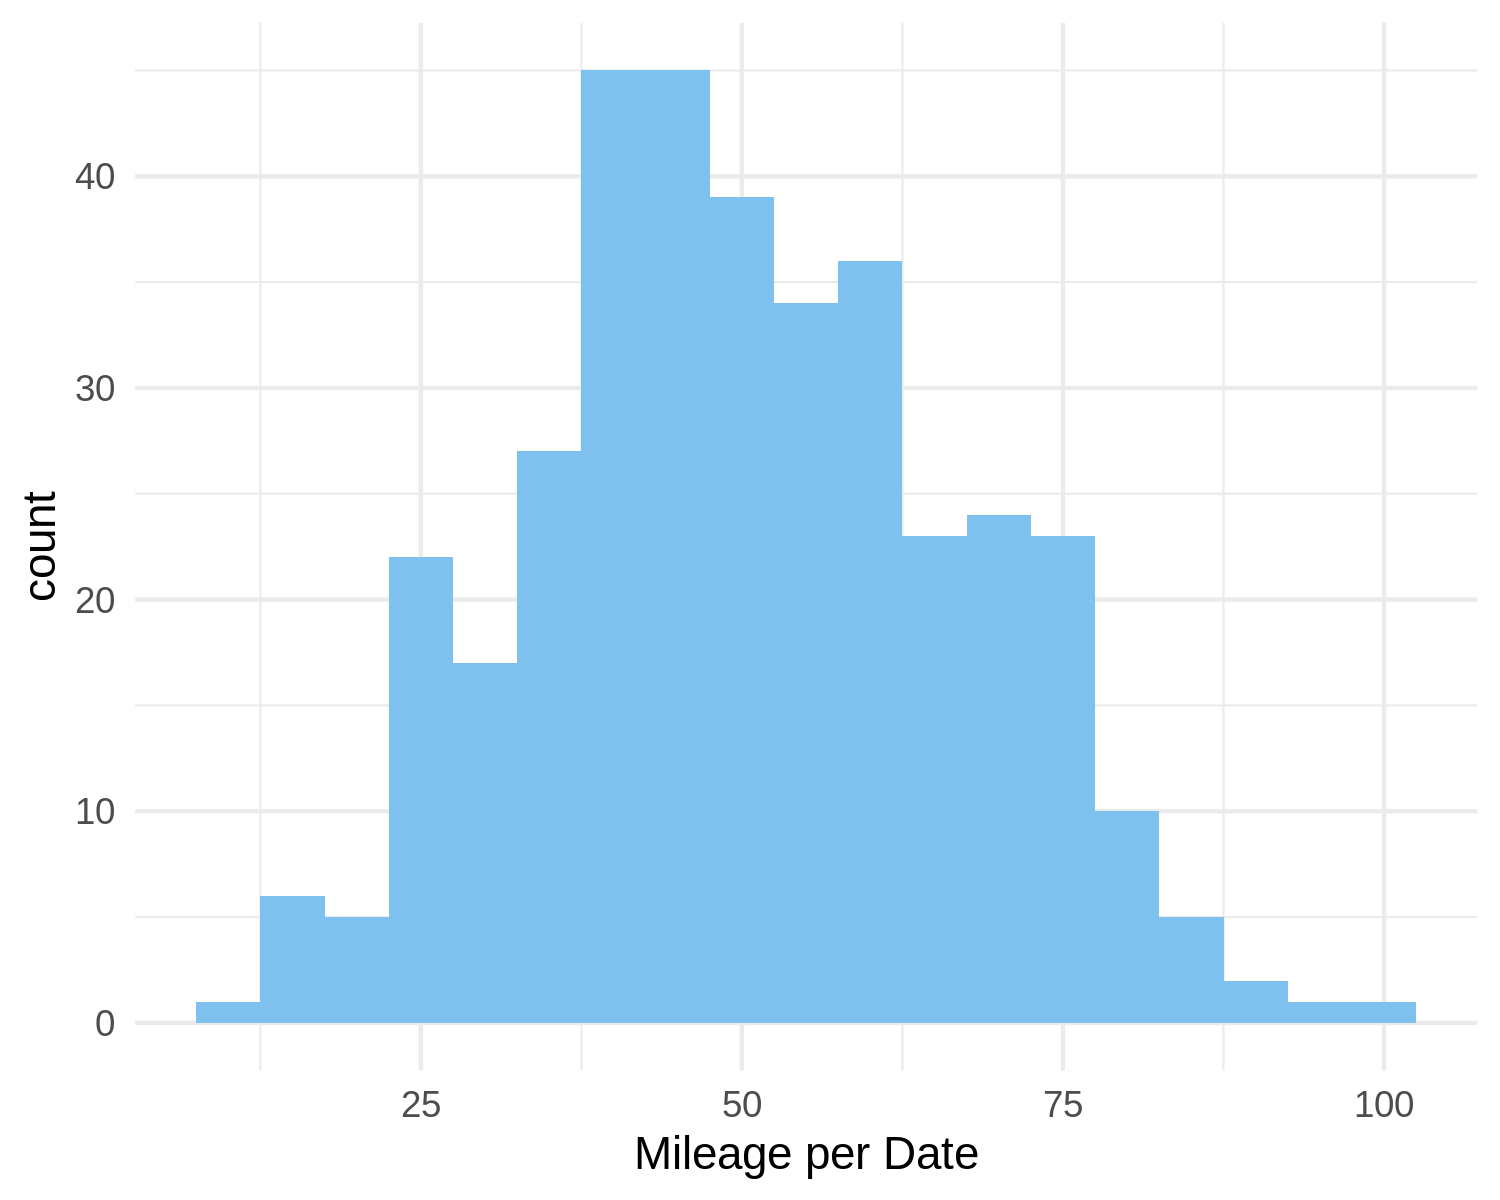

In [18]:
p5 = ggplot(df2d, aes(x=SumMi)) +
    geom_histogram(fill="skyblue2", binwidth=5) +
    theme_minimal() +
    labs(x="Mileage per Date")
p5

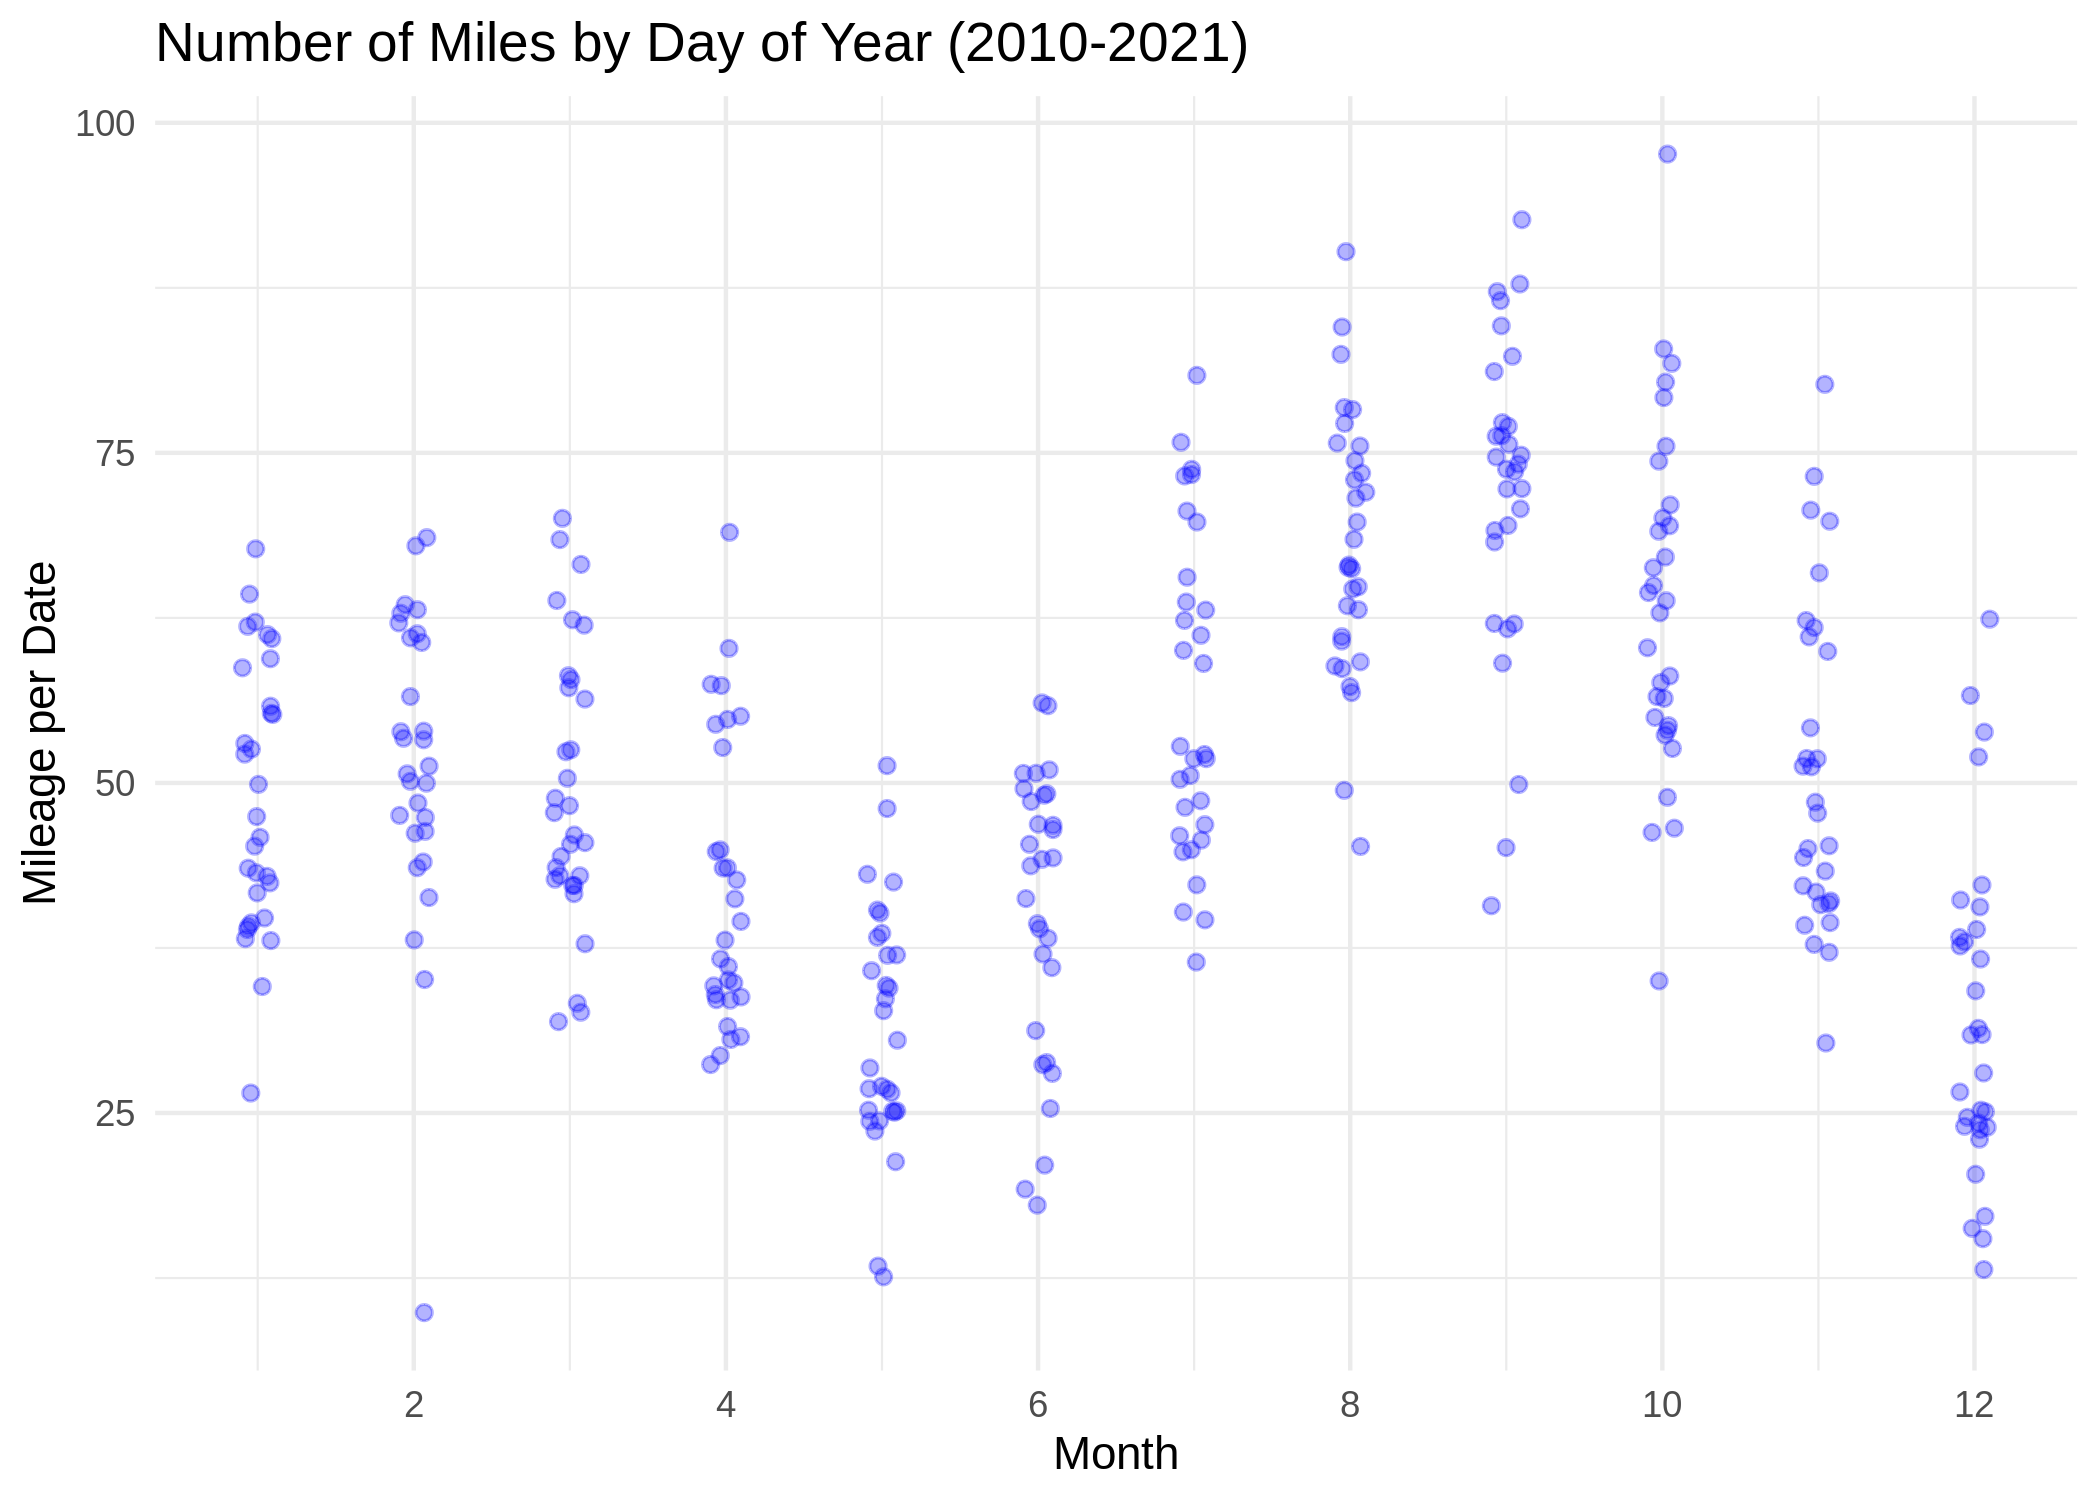

In [19]:
options(repr.plot.width=7, repr.plot.height=5)
p6 = ggplot(df2d, aes(x=Month,y=SumMi)) +
    geom_point(position=position_jitter(w=.1,h=0),color="blue",alpha=.3) +
    theme_minimal() +
    labs(x="Month",y="Mileage per Date",title="Number of Miles by Day of Year (2010-2021)") +
    scale_x_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12))
p6

In [20]:
df2o <- df2e %>%
    filter(SumMi < 13.2 | SumMi > 95 | DateOrder == 63) %>%
    mutate(Mon_DD = c("Feb 29", "Mar 3", "May 23", "Oct 2", "Dec 9"))
df2o

MMDD,Month,Day,DateOrder,numYear,SumMi,Mon_DD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2/29,2,29,60,1,9.88,Feb 29
3/3,3,3,63,9,70.04,Mar 3
5/23,5,23,144,3,12.59,May 23
10/2,10,2,276,12,97.63,Oct 2
12/9,12,9,344,3,13.14,Dec 9


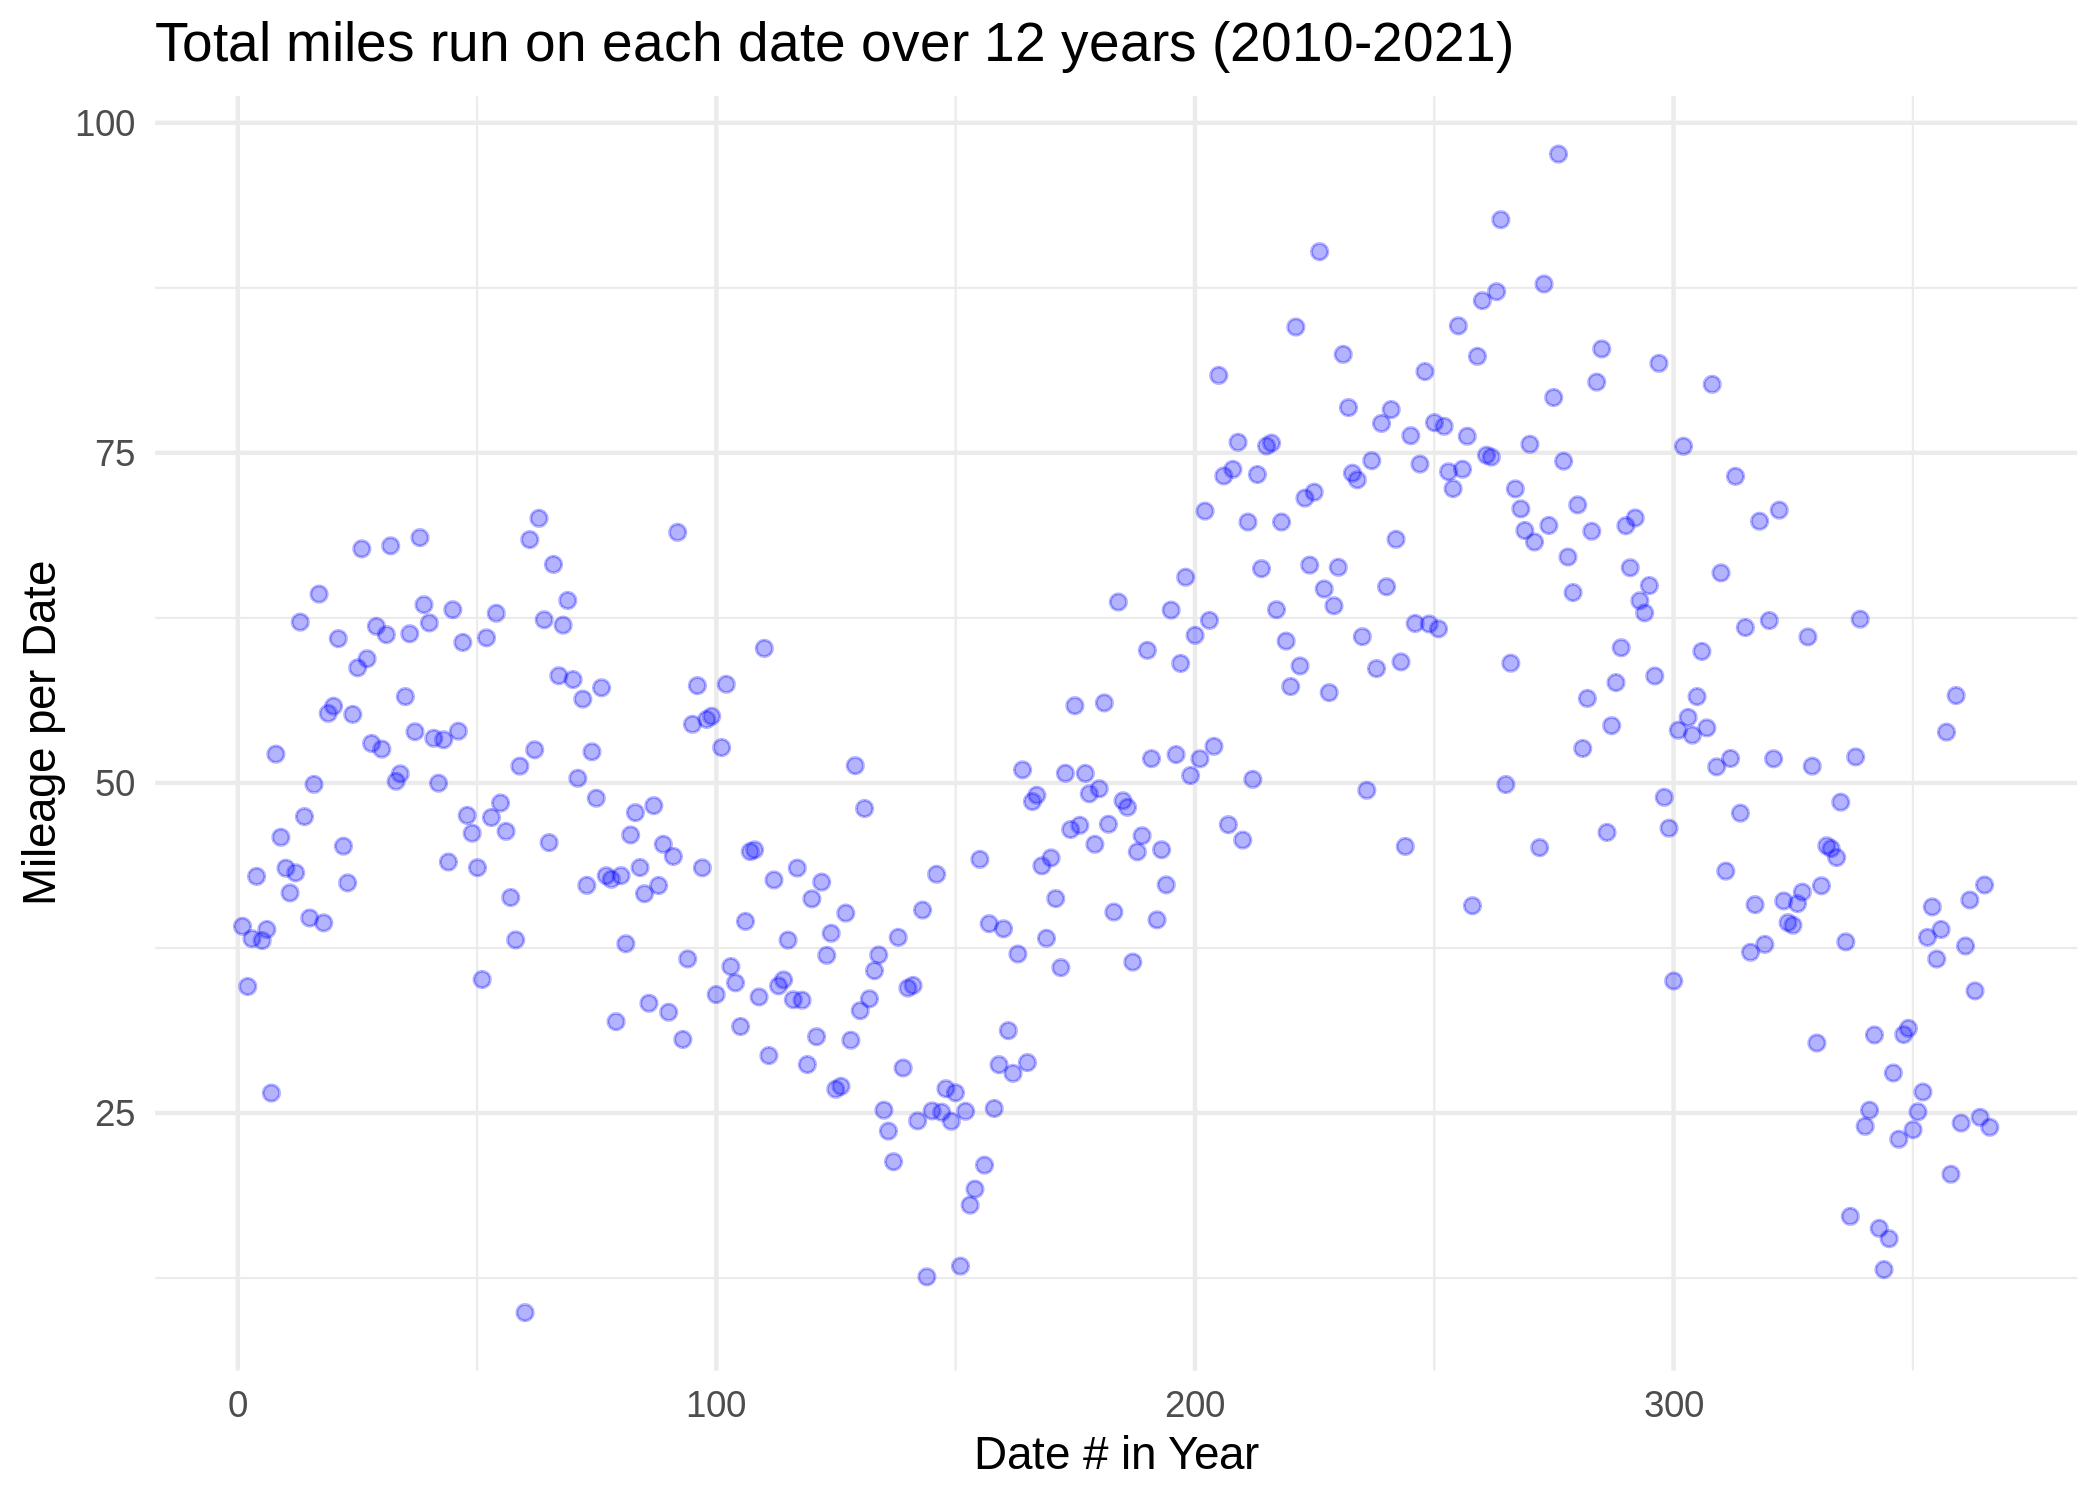

In [21]:
p6a = ggplot(df2d, aes(x=DateOrder,y=SumMi)) +
    geom_point(position=position_jitter(w=.1,h=0),color="blue",alpha=.3) +
    theme_minimal() +
    labs(x="Date # in Year",y="Mileage per Date",title="Total miles run on each date over 12 years (2010-2021)")
p6a

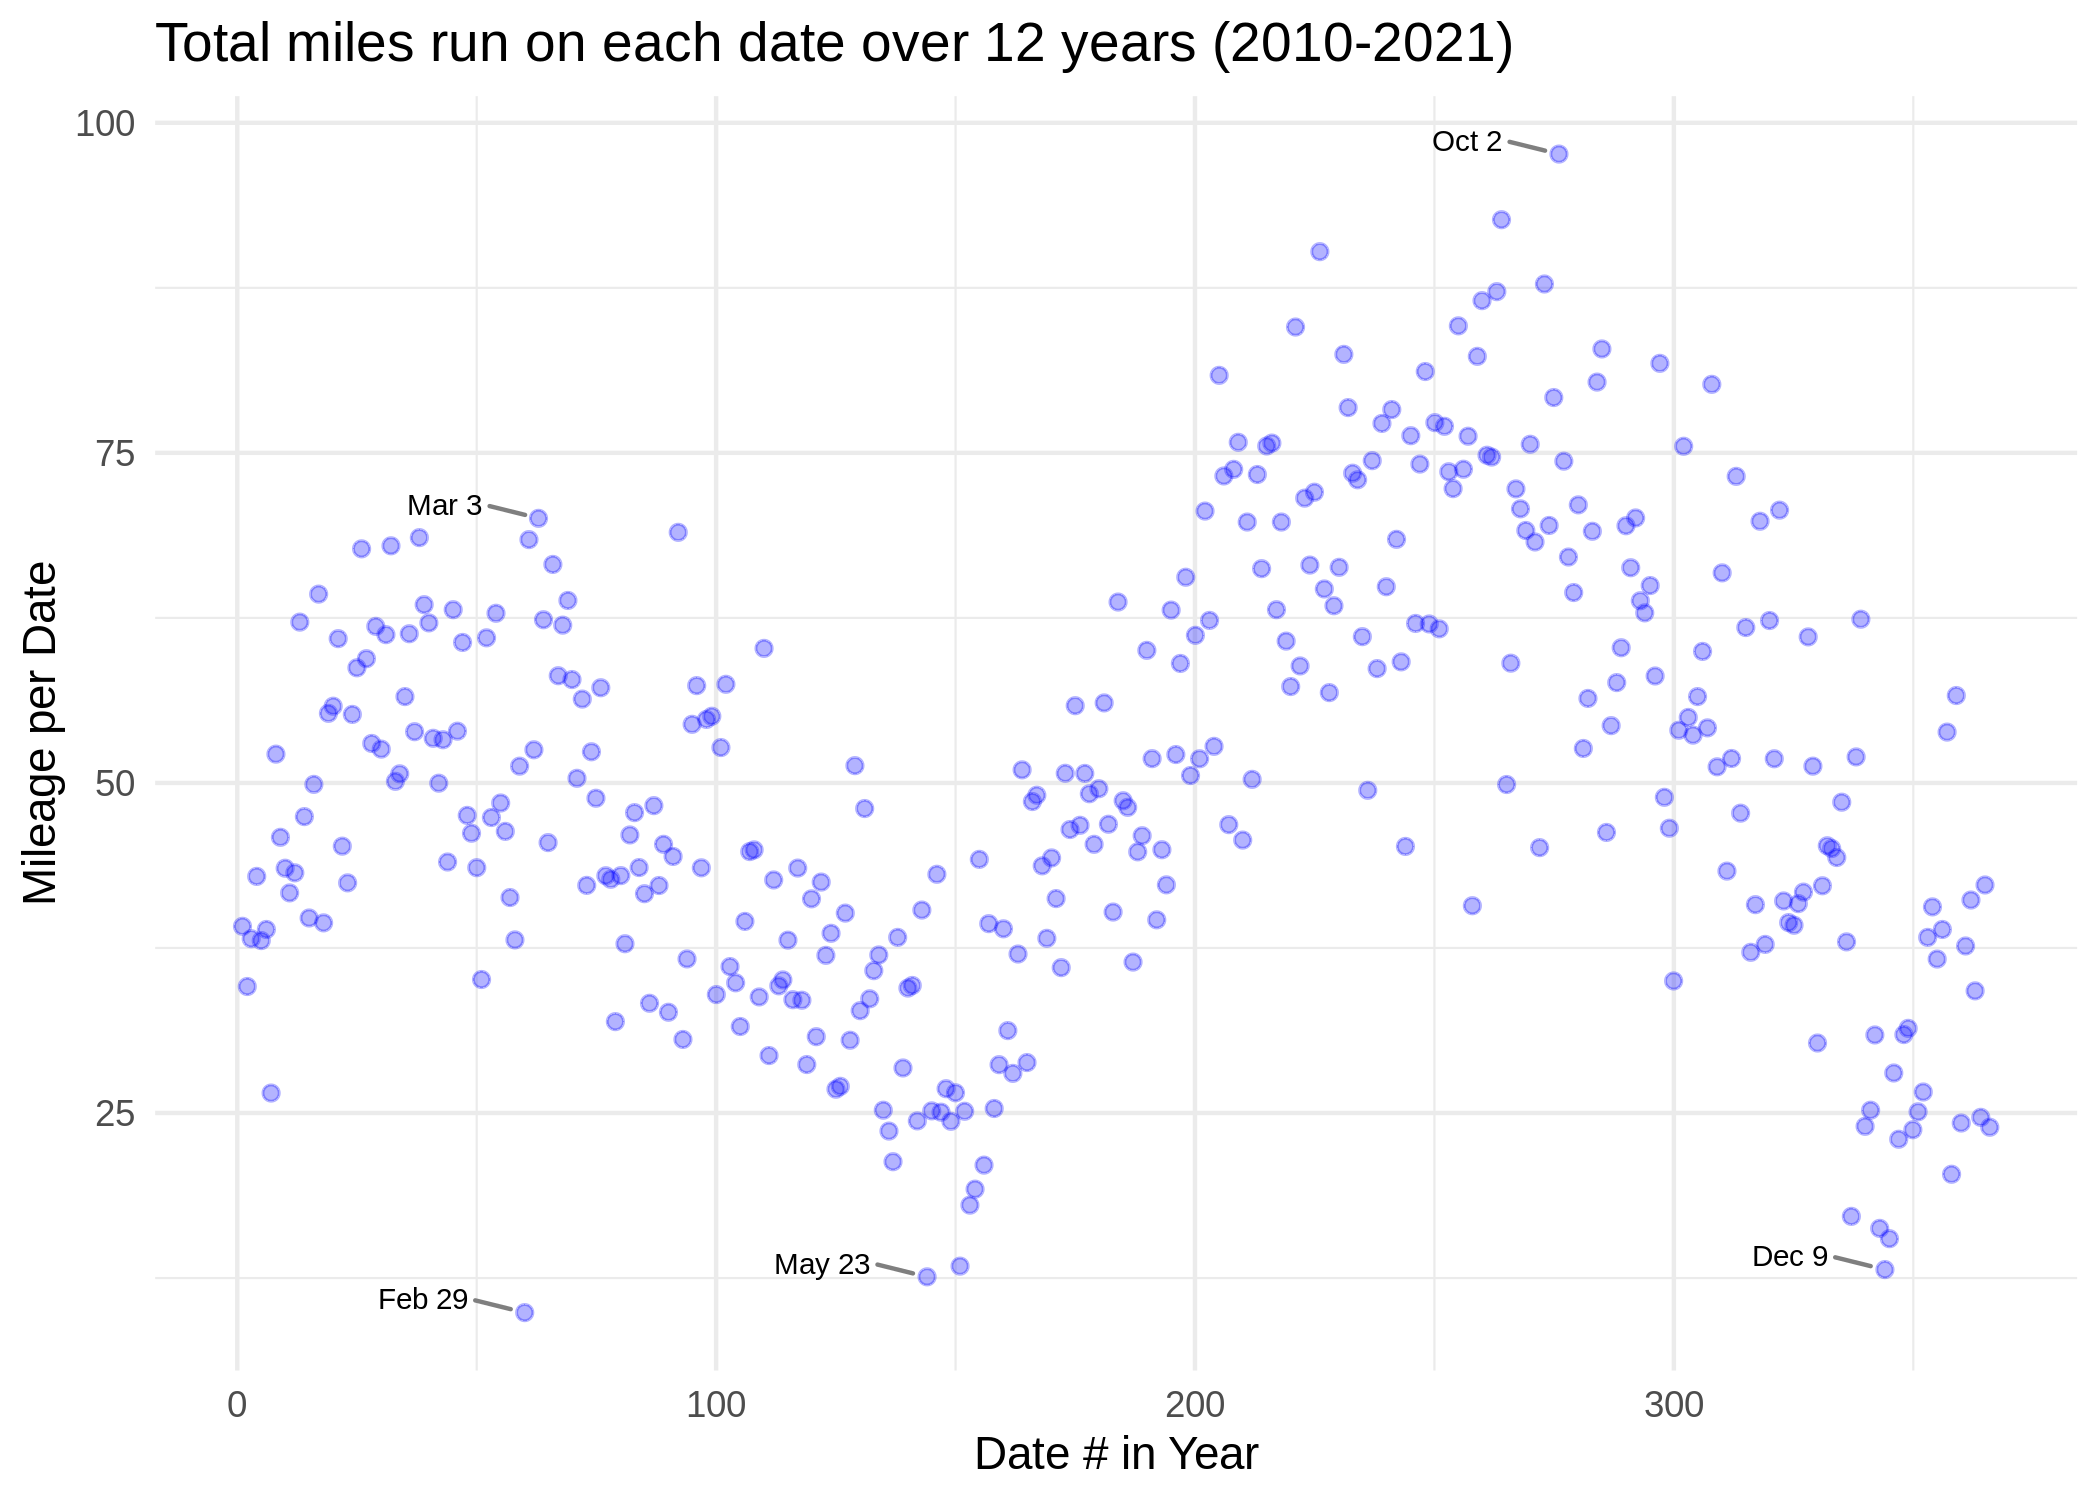

In [22]:
library('ggrepel')
p6b = ggplot(df2d, aes(x=DateOrder,y=SumMi)) +
    geom_point(position=position_jitter(w=.1,h=0),color="blue",alpha=.3) +
    theme_minimal() +
    labs(x="Date # in Year",y="Mileage per Date",title="Total miles run on each date over 12 years (2010-2021)") +
    geom_text_repel(
            data = df2o,
            nudge_y = 1,
            nudge_x = -15,
            segment.size = .5,
            size = 2.5,
            hjust = 1,
            segment.color = "grey50",
            point.padding = .3,
            aes(x=DateOrder, y=SumMi, label = Mon_DD),
        )
p6b

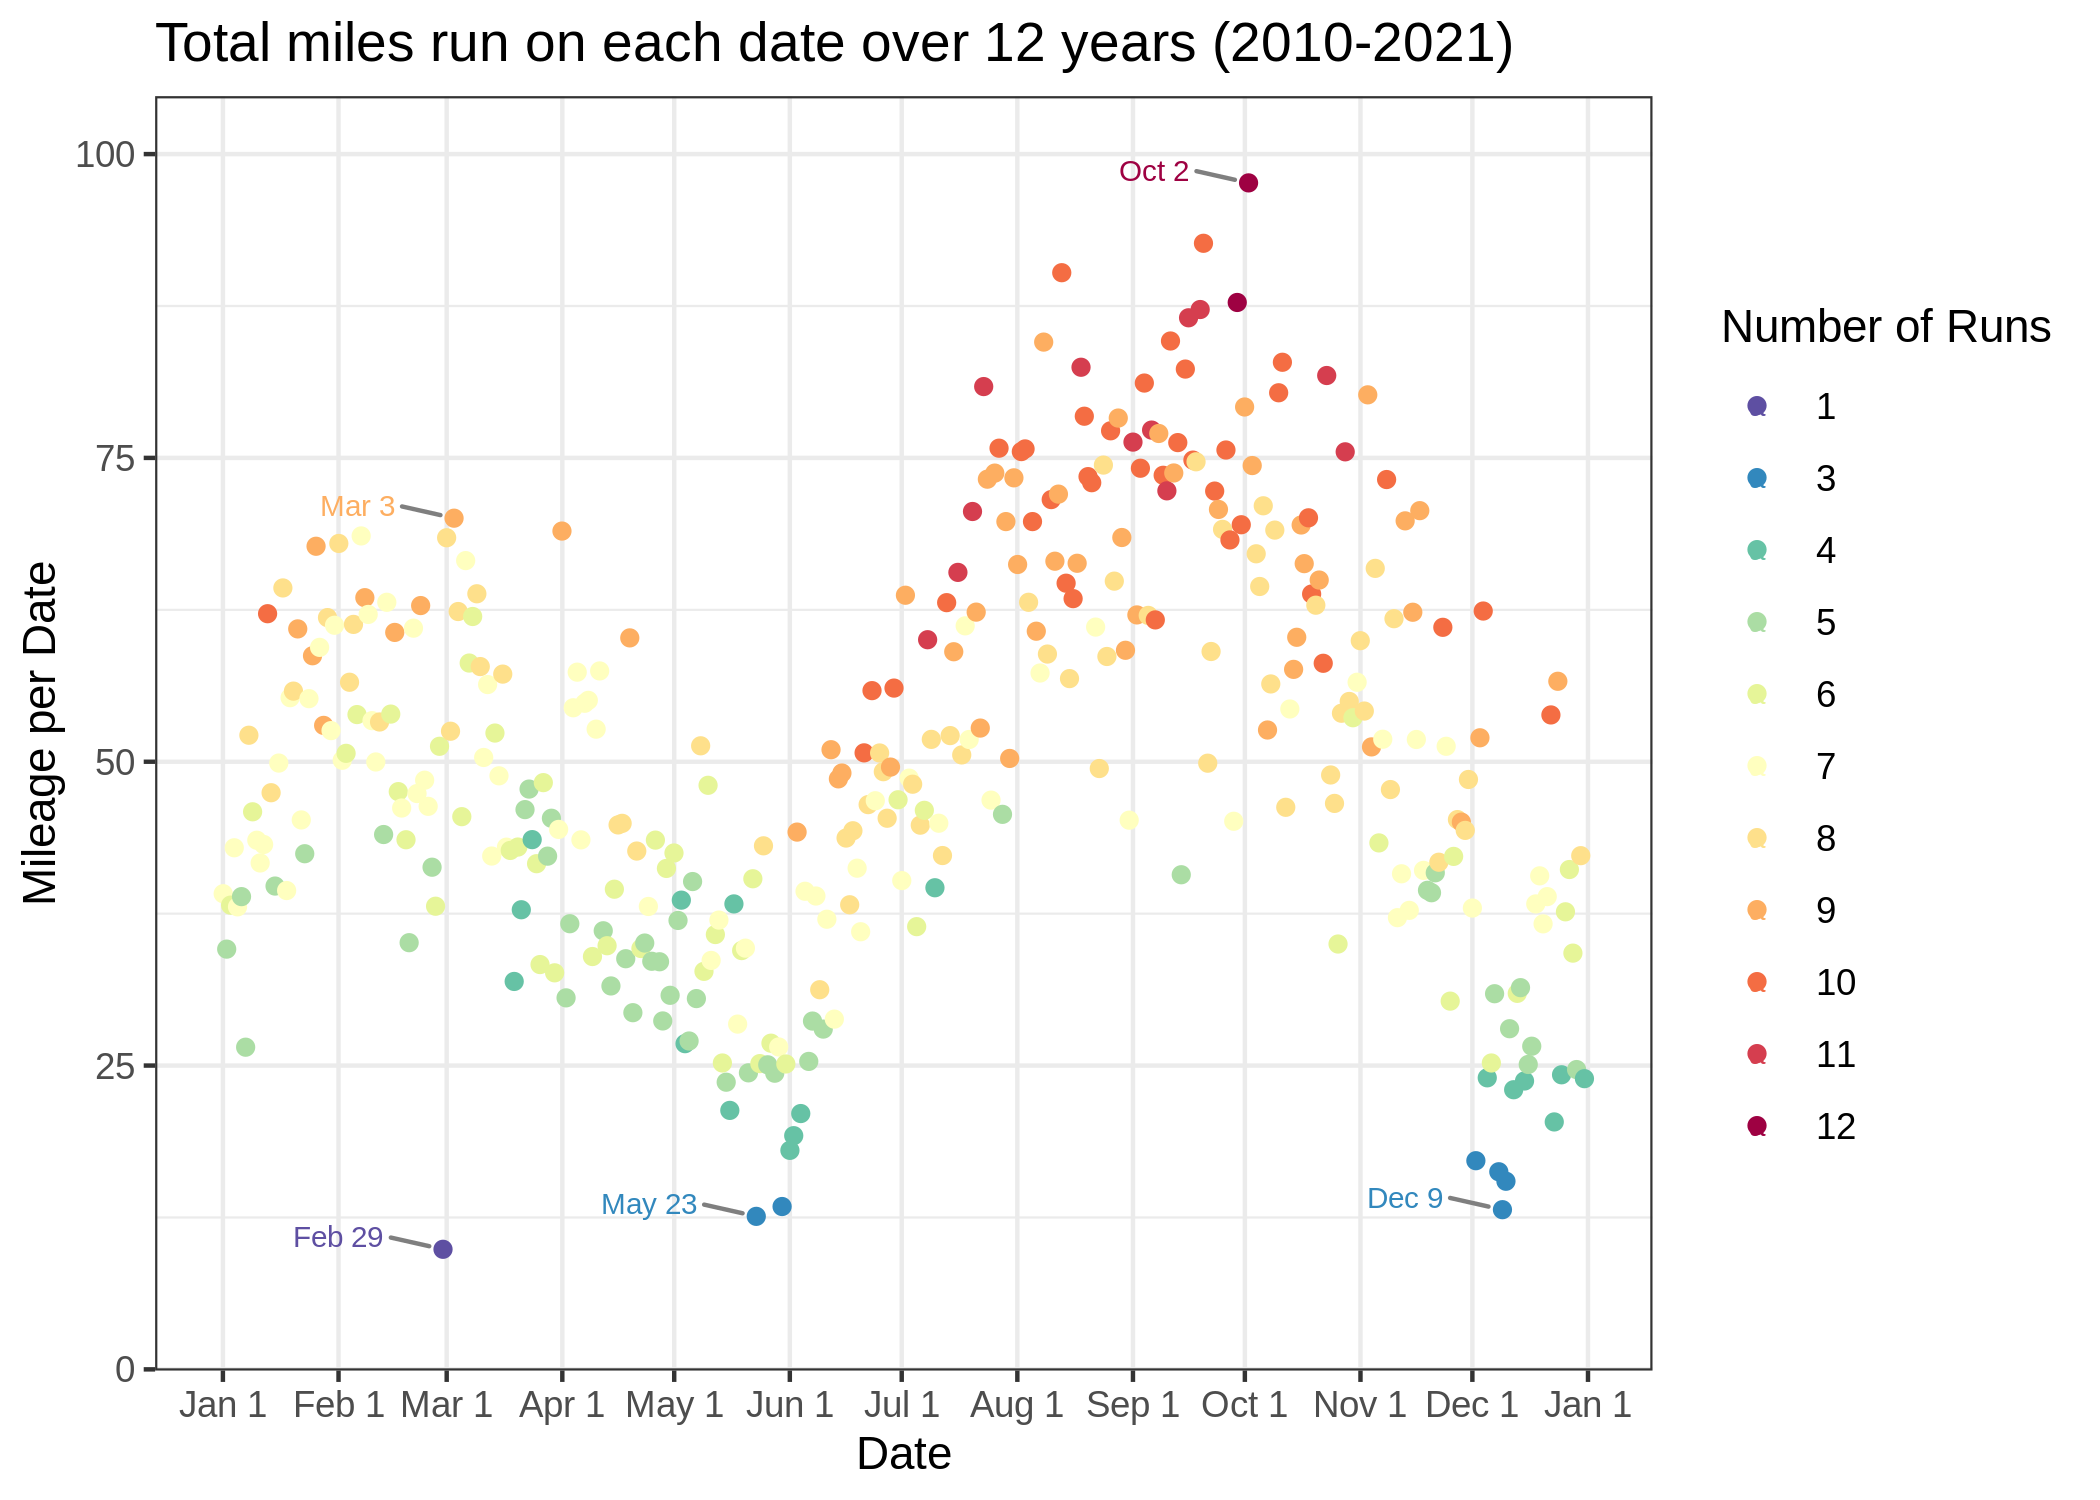

In [23]:
p6c = ggplot(df2d, aes(x=DateOrder,y=SumMi,color=as.factor(numYear))) +
    geom_point(position=position_jitter(w=.1,h=0),alpha=1) +
    theme_bw() +
    labs(x="Date",y="Mileage per Date",color="Number of Runs",
         title="Total miles run on each date over 12 years (2010-2021)") +
    scale_color_brewer(type="div", palette=9, direction=-1) +
    scale_x_continuous(breaks=c(1,32,61,92,122,153,183,214,245,275,306,336,367), 
                       labels=c("Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1",
                                "Jul 1","Aug 1","Sep 1","Oct 1","Nov 1","Dec 1","Jan 1"),
                       minor_breaks=NULL) +
    scale_y_continuous(limits=c(0,100), breaks=c(0,25,50,75,100), labels=c(0,25,50,75,100)) +
    coord_cartesian(ylim=c(4.67,100)) +
    geom_text_repel(
            data = df2o,
            nudge_y = 1,
            nudge_x = -20,
            segment.size = .5,
            size = 2.5,
            hjust = 1,
            segment.color = "grey50",
            point.padding = .3,
            aes(x=DateOrder, y=SumMi, label = Mon_DD),
        )
p6c

In [24]:
df2e %>% select(1,5,6) %>% arrange(-SumMi) %>% head(10)

MMDD,numYear,SumMi
<chr>,<dbl>,<dbl>
10/2,12,97.63
9/20,10,92.66
8/13,10,90.24
9/29,12,87.79
9/19,11,87.21
9/16,11,86.53
9/11,10,84.62
8/8,9,84.53
10/11,10,82.87


In [25]:
df2e %>% select(1,5,6) %>% arrange(-SumMi) %>% tail(10)

MMDD,numYear,SumMi
<chr>,<dbl>,<dbl>
12/23,4,20.36
6/2,4,19.23
6/1,4,18.02
12/2,3,17.17
12/8,3,16.26
12/10,3,15.48
5/30,3,13.40
12/9,3,13.14
5/23,3,12.59


In [26]:
df2e %>%
    group_by(Month) %>%
    arrange(-SumMi) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

MMDD,Month,Day,DateOrder,numYear,SumMi,rk
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
10/2,10,2,276,12,97.63,1
9/20,9,20,264,10,92.66,1
8/13,8,13,226,10,90.24,1
7/23,7,23,205,11,80.87,1
11/3,11,3,308,9,80.19,1
3/3,3,3,63,9,70.04,1
4/1,4,1,92,9,68.98,1
2/7,2,7,38,7,68.58,1
1/26,1,26,26,9,67.73,1


In [27]:
df2e %>%
    group_by(Month) %>%
    arrange(SumMi) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

MMDD,Month,Day,DateOrder,numYear,SumMi,rk
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2/29,2,29,60,1,9.88,1
5/23,5,23,144,3,12.59,1
12/9,12,9,344,3,13.14,1
6/1,6,1,153,4,18.02,1
1/7,1,7,7,5,26.51,1
4/28,4,28,119,5,28.67,1
11/25,11,25,330,6,30.30,1
3/19,3,19,79,4,31.92,1
10/26,10,26,300,6,35.00,1


In [28]:
df2e %>%
    group_by(Month) %>%
    summarize(mean = mean(SumMi))

Month,mean
<dbl>,<dbl>
1,48.93871
2,51.44966
3,49.61516
4,42.08133
5,31.41742
6,40.32167
7,56.30129
8,67.98355
9,71.95000


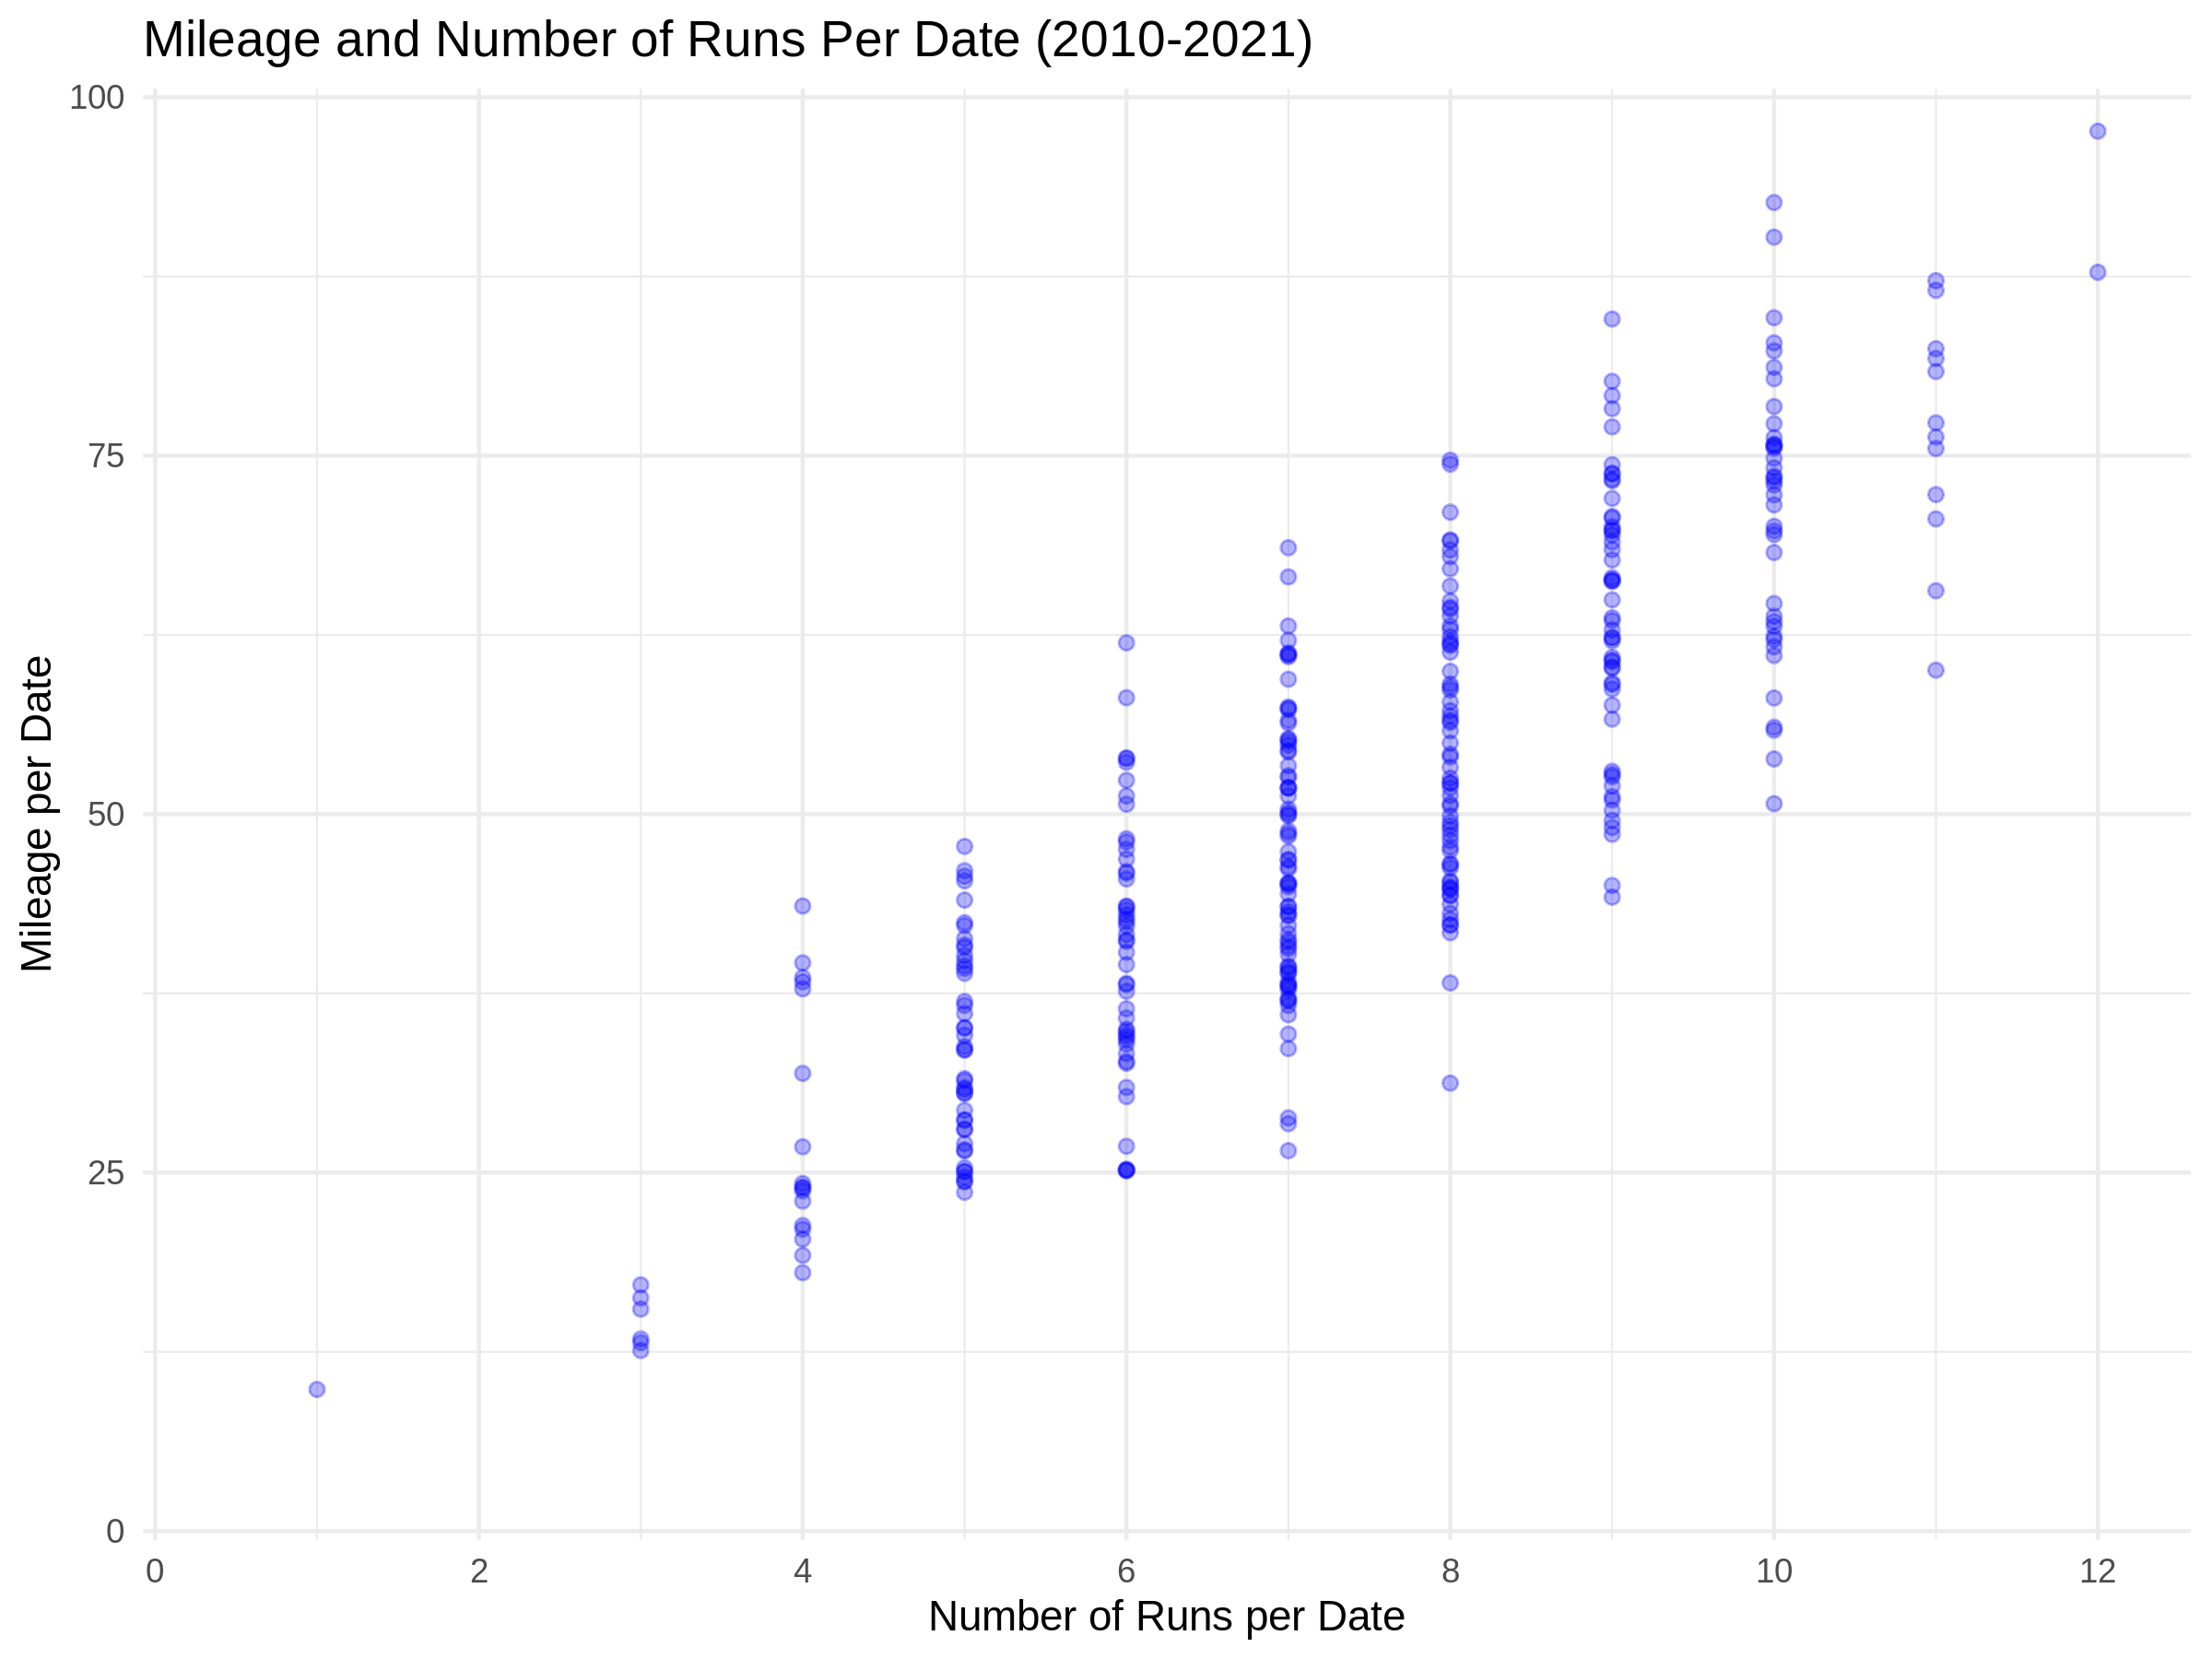

In [29]:
options(repr.plot.height=6, repr.plot.width=8)
p7 = ggplot(df2d, aes(x=numYear,y=SumMi)) +
    geom_point(alpha=.3,color="blue") +
    theme_minimal() +
    labs(x="Number of Runs per Date",y="Mileage per Date",title="Mileage and Number of Runs Per Date (2010-2021)") +
    theme(legend.position="top") +
    coord_cartesian(ylim=c(4,96),xlim=c(.5,12)) +
    scale_x_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12))
p7

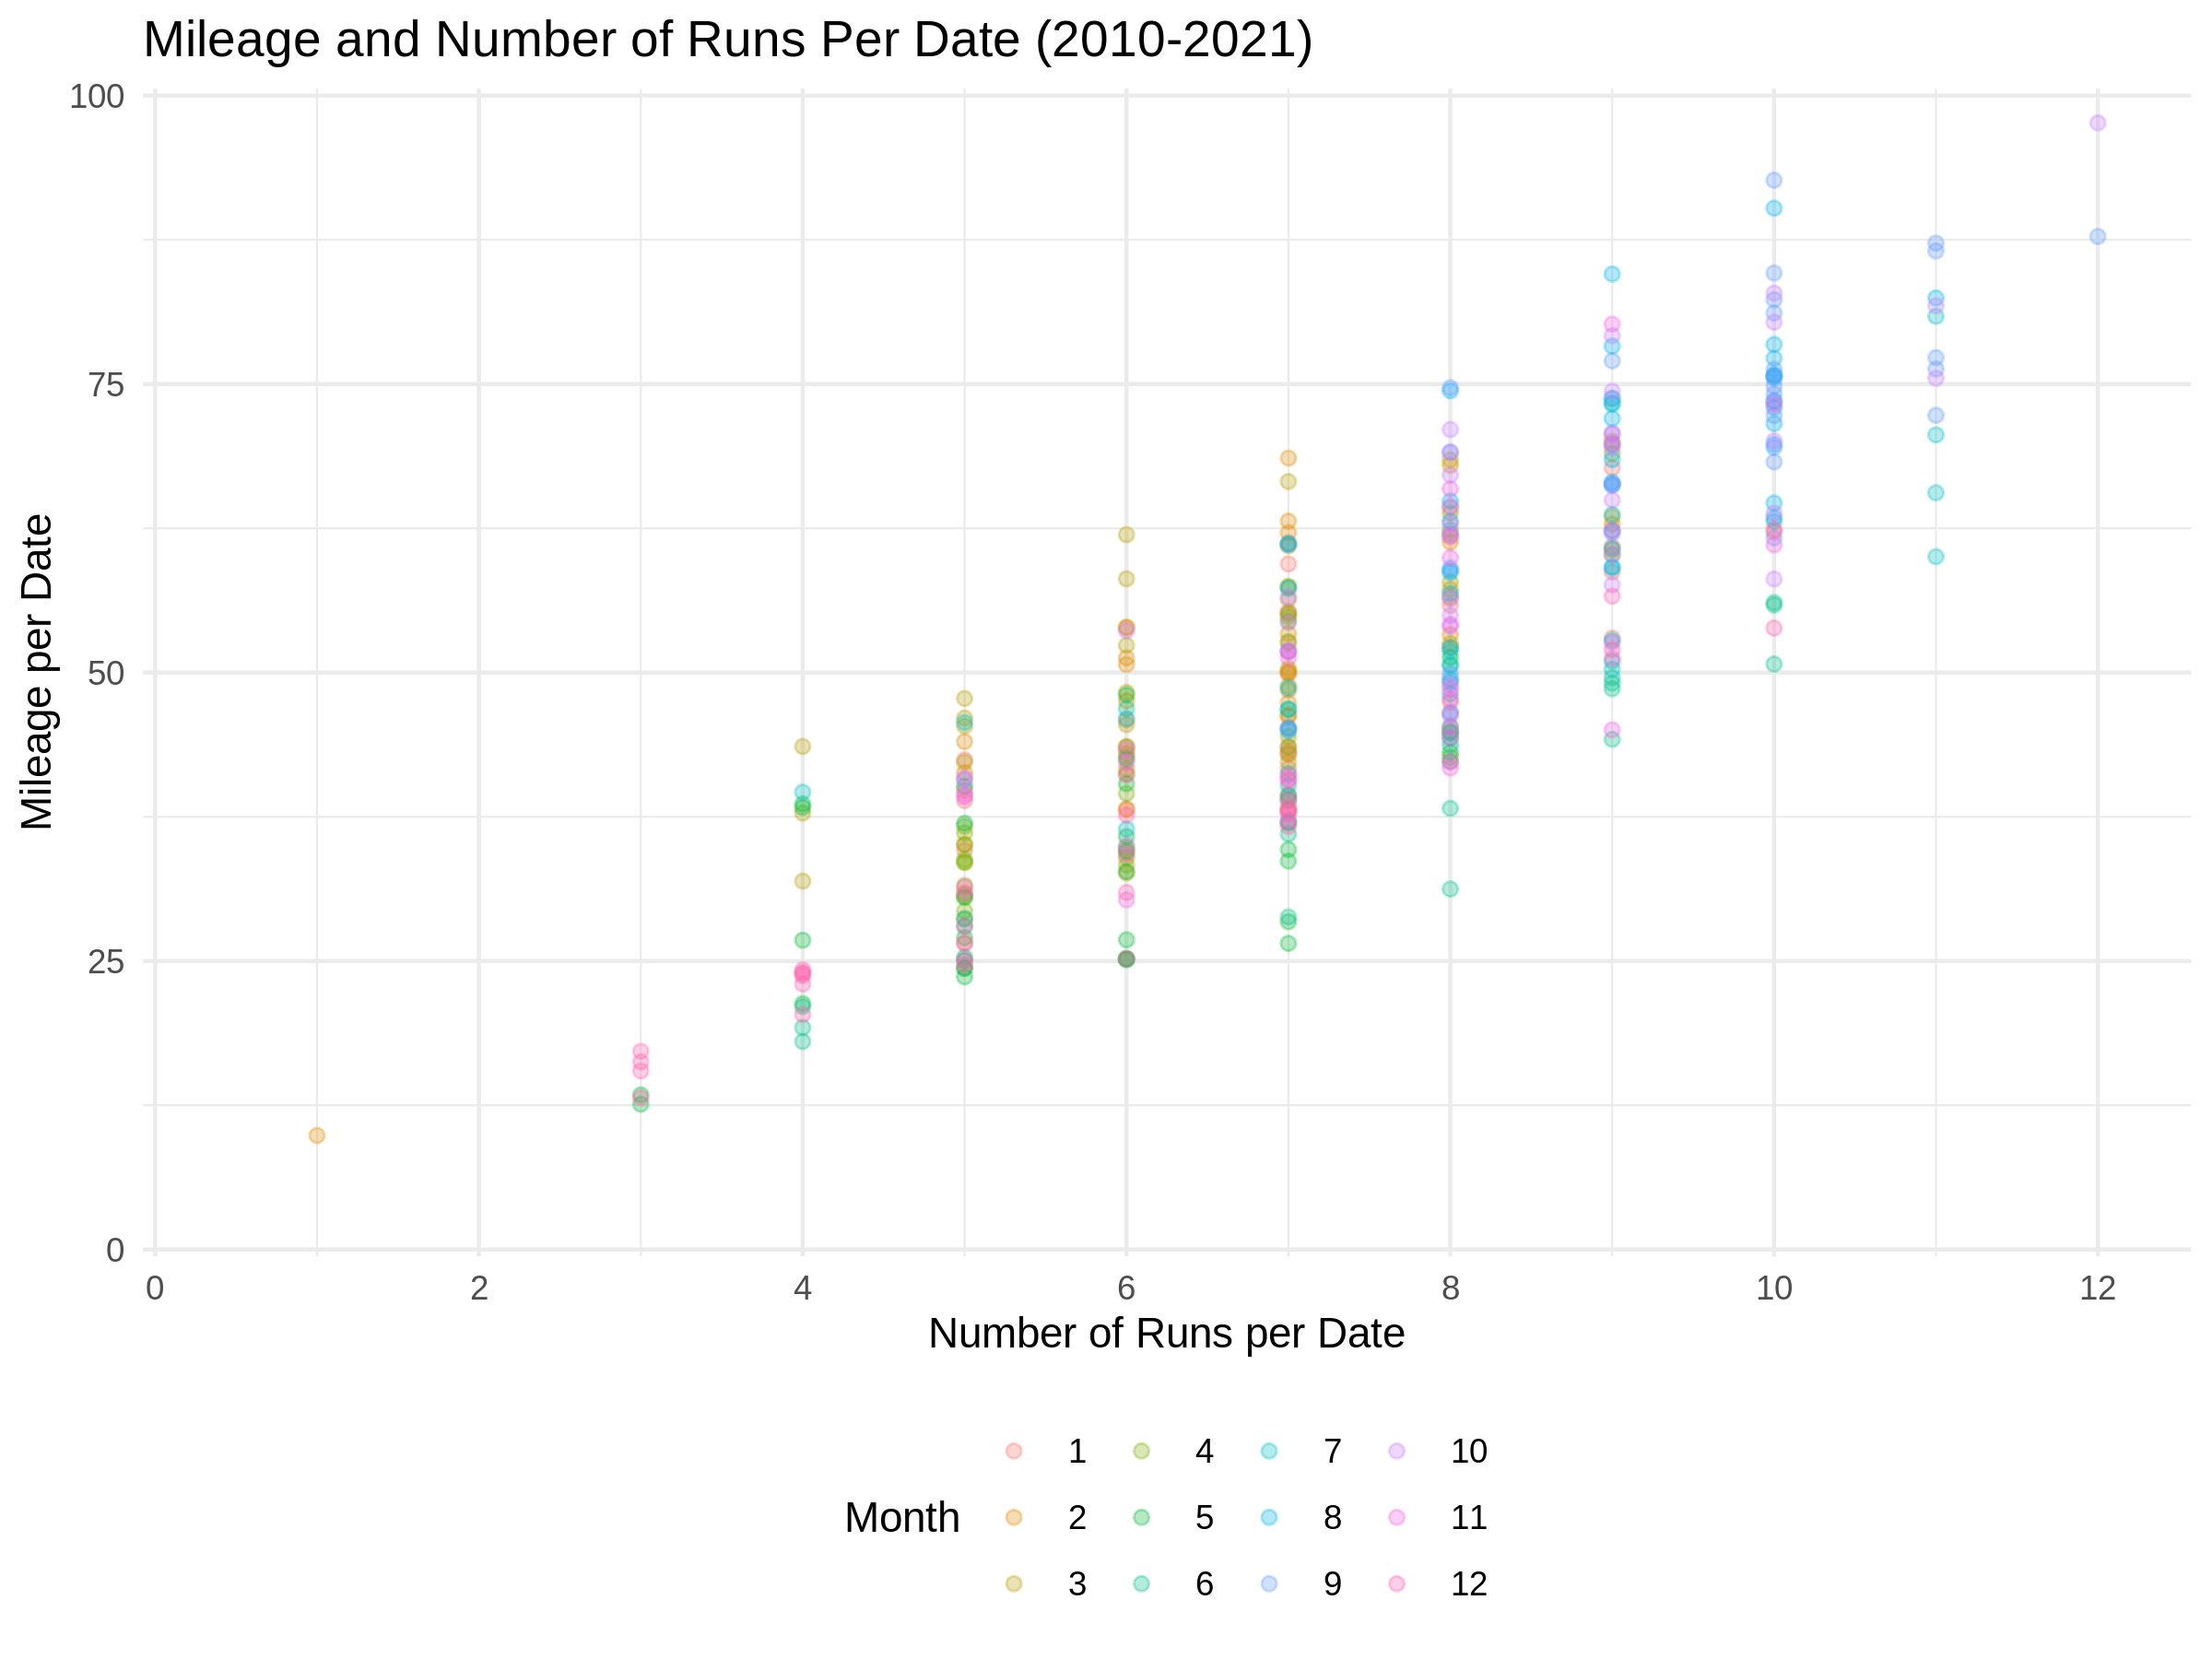

In [30]:
options(repr.plot.height=6, repr.plot.width=8)
p7a = ggplot(df2d, aes(x=numYear,y=SumMi,color=as.factor(Month))) +
    geom_point(alpha=.3) +
    theme_minimal() +
    labs(x="Number of Runs per Date",y="Mileage per Date",title="Mileage and Number of Runs Per Date (2010-2021)",
        color="Month") +
    theme(legend.position="bottom") +
    coord_cartesian(ylim=c(4,96),xlim=c(.5,12)) +
    scale_x_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12))
p7a

In [31]:
head(df2e)

MMDD,Month,Day,DateOrder,numYear,SumMi
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1/1,1,1,1,7,39.14
1/2,1,2,2,5,34.58
1/3,1,3,3,6,38.20
1/4,1,4,4,7,42.92
1/5,1,5,5,7,38.06
1/6,1,6,6,5,38.90


In [32]:
df2e %>% summarize(mean_mi = mean(SumMi), sd_mi = sd(SumMi), mean_n = mean(numYear), sd_n = sd(numYear))

mean_mi,sd_mi,mean_n,sd_n
<dbl>,<dbl>,<dbl>,<dbl>
50.56609,16.75099,7.352459,1.915712


In [33]:
cor(df2e$numYear, df2e$SumMi)

[1] 0.8455528

In [34]:
cov(df2e$numYear, df2e$SumMi)

[1] 27.13385

In [35]:
df2e %>% 
group_by(Month) %>%
summarize(mean_mi = mean(SumMi), sd_mi = sd(SumMi), mean_n = mean(numYear), sd_n = sd(numYear))

Month,mean_mi,sd_mi,mean_n,sd_n
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,48.93871,10.218770,7.129032,1.310011
2,51.44966,11.802963,6.689655,1.560756
3,49.61516,10.434280,6.387097,1.308368
4,42.08133,10.788726,6.300000,1.263547
5,31.41742,9.105588,5.580645,1.285151
6,40.32167,10.821991,7.366667,1.771096
7,56.30129,12.223757,8.258065,1.731430
8,67.98355,10.079161,9.000000,1.064581
9,71.95000,12.163793,9.500000,1.432384


In [36]:
df2e %>%
    filter(Month==10)

MMDD,Month,Day,DateOrder,numYear,SumMi
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10/1,10,1,275,9,79.19
10/2,10,2,276,12,97.63
10/3,10,3,277,9,74.37
10/4,10,4,278,8,67.11
10/5,10,5,279,8,64.42
10/6,10,6,280,8,71.06
10/7,10,7,281,9,52.61
10/8,10,8,282,8,56.40
10/9,10,9,283,8,69.06


In [53]:
png("rpd.png", width=1200, height=800)
ggplot(df2d, aes(x=DateOrder,y=SumMi,color=as.factor(numYear))) +
    geom_point(position=position_jitter(w=.1,h=0),alpha=1,size=4.5) +
    theme_bw() +
    labs(x="Date",y="Mileage per Date",color="Number of Runs",
         title="Total miles run on each date over 12 years (2010-2021)") +
    scale_color_brewer(type="div", palette=9, direction=-1) +
    scale_x_continuous(breaks=c(1,32,61,92,122,153,183,214,245,275,306,336,367), 
                       labels=c("Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1",
                                "Jul 1","Aug 1","Sep 1","Oct 1","Nov 1","Dec 1","Jan 1"),
                       minor_breaks=NULL) +
    scale_y_continuous(limits=c(0,100), breaks=c(0,25,50,75,100), labels=c(0,25,50,75,100)) +
    coord_cartesian(ylim=c(4.67,100)) +
    theme(text = element_text(size = 24)) +
    geom_text_repel(
            data = df2o,
            nudge_y = 1,
            nudge_x = -20,
            segment.size = 1,
            size = 8,
            hjust = 1,
            segment.color = "grey50",
            point.padding = .3,
            aes(x=DateOrder, y=SumMi, label = Mon_DD),
        ) +
    guides(color = guide_legend(override.aes = list(size = 4.5)))
dev.off()

png 
  2

In [38]:
df2d %>% head(10)

Date,Mileage,time_corr,pace_min,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder,SumMi
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-01,6.82,0:48:44,7.145650,1,1,1/1,7,1,1,1,7,1,39.14
2021-01-02,7.09,0:53:35,7.557593,1,2,1/2,5,1,1,1,5,2,34.58
2020-01-03,4.35,0:32:30,7.471264,1,3,1/3,7,1,1,1,6,3,38.20
2021-01-04,7.00,0:53:48,7.685714,1,4,1/4,7,1,1,1,7,4,42.92
2021-01-05,7.43,0:54:13,7.296994,1,5,1/5,7,1,1,1,7,5,38.06
2021-01-06,6.00,0:40:44,6.788889,1,6,1/6,5,1,1,1,5,6,38.90
2021-01-07,8.00,1:06:54,8.362500,1,7,1/7,5,1,1,1,5,7,26.51
2021-01-08,6.00,0:45:27,7.575000,1,8,1/8,8,1,1,1,8,8,52.18
2021-01-09,11.12,1:17:22,6.957434,1,9,1/9,6,1,1,1,6,9,45.88
